# Домашнее задание к уроку 4: Сверточные сети

In [1]:
import matplotlib.pyplot as plt

from convolutional_basics.fullyconnectedmodel import FullyConnectedModel
from convolutional_basics.models import SimpleCNN, CNNWithResidual, CIFARCNN, SimpleCNN4Conv, SimpleCNN6Conv, CastomPoolSimpleCNN, CastomGeluSimpleCNN, CastomAttentionSimpleCNN, CastomWithNoiseSimpleCNN, CNNWithWideres, CNNWithBottleneck

from convolutional_basics.trainer import train_model
from convolutional_basics.datasets import get_mnist_loaders, get_cifar_loaders
from convolutional_basics.utils import inference_time, plot_confusion_matrix_for_models, visualize_all_models_activations, visualize_all_models_feature_maps

import time

## Задание 1: Сравнение CNN и полносвязных сетей

### 1.1 Сравнение на MNIST

In [1]:
fully_connected_model = FullyConnectedModel().to("cuda")

simple_cnn = SimpleCNN().to("cuda")

cnn_with_rb = CNNWithResidual().to("cuda")

models = [fully_connected_model, simple_cnn, cnn_with_rb]
models_name = ["fully_connected_model", "simple_cnn", "cnn_with_rb"]

NameError: name 'FullyConnectedModel' is not defined

In [2]:
train_data, test_data = get_mnist_loaders()

In [4]:
metric_train_loss = []
metric_train_acc = []
metric_test_loss = []
metric_test_acc = []
times = []
inference_times = []

for model in models:
  start = time.time()
  history = train_model(model, train_data, test_data, epochs=30, device="cuda")
  end = time.time()

  times.append(end-start)
  inf_time = inference_time(model, test_data, "cuda")
  inference_times.append(inf_time)

  metric_train_loss.append(history["train_losses"])
  metric_train_acc.append(history["train_accs"])
  metric_test_loss.append(history["test_losses"])
  metric_test_acc.append(history["test_accs"])

metrics = [metric_train_loss, metric_train_acc, metric_test_loss, metric_test_acc]
metrics_name = ["train_loss", "train_accuracy", "test_loss", "test_accuracy"]

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 71.79it/s]


Epoch 1/30:
Train Loss: 0.3954, Train Acc: 0.8896
Test Loss: 0.1317, Test Acc: 0.9598
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.51it/s]


Epoch 2/30:
Train Loss: 0.1824, Train Acc: 0.9434
Test Loss: 0.1018, Test Acc: 0.9664
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.02it/s]


Epoch 3/30:
Train Loss: 0.1512, Train Acc: 0.9521
Test Loss: 0.0847, Test Acc: 0.9753
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.44it/s]


Epoch 4/30:
Train Loss: 0.1334, Train Acc: 0.9591
Test Loss: 0.0734, Test Acc: 0.9772
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.65it/s]


Epoch 5/30:
Train Loss: 0.1206, Train Acc: 0.9620
Test Loss: 0.0730, Test Acc: 0.9769
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.27it/s]


Epoch 6/30:
Train Loss: 0.1116, Train Acc: 0.9653
Test Loss: 0.0712, Test Acc: 0.9776
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.95it/s]


Epoch 7/30:
Train Loss: 0.1013, Train Acc: 0.9682
Test Loss: 0.0658, Test Acc: 0.9785
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 75.59it/s]


Epoch 8/30:
Train Loss: 0.0978, Train Acc: 0.9690
Test Loss: 0.0726, Test Acc: 0.9771
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 75.23it/s]


Epoch 9/30:
Train Loss: 0.0934, Train Acc: 0.9708
Test Loss: 0.0679, Test Acc: 0.9793
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.63it/s]


Epoch 10/30:
Train Loss: 0.0871, Train Acc: 0.9721
Test Loss: 0.0663, Test Acc: 0.9803
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 75.48it/s]


Epoch 11/30:
Train Loss: 0.0859, Train Acc: 0.9726
Test Loss: 0.0639, Test Acc: 0.9807
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 75.81it/s]


Epoch 12/30:
Train Loss: 0.0818, Train Acc: 0.9735
Test Loss: 0.0663, Test Acc: 0.9795
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.69it/s]


Epoch 13/30:
Train Loss: 0.0771, Train Acc: 0.9747
Test Loss: 0.0577, Test Acc: 0.9817
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.54it/s]


Epoch 14/30:
Train Loss: 0.0779, Train Acc: 0.9745
Test Loss: 0.0640, Test Acc: 0.9810
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 73.94it/s]


Epoch 15/30:
Train Loss: 0.0756, Train Acc: 0.9756
Test Loss: 0.0649, Test Acc: 0.9808
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.05it/s]


Epoch 16/30:
Train Loss: 0.0733, Train Acc: 0.9760
Test Loss: 0.0599, Test Acc: 0.9818
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 75.23it/s]


Epoch 17/30:
Train Loss: 0.0715, Train Acc: 0.9770
Test Loss: 0.0641, Test Acc: 0.9802
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 73.16it/s]


Epoch 18/30:
Train Loss: 0.0716, Train Acc: 0.9764
Test Loss: 0.0617, Test Acc: 0.9816
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 72.25it/s]


Epoch 19/30:
Train Loss: 0.0666, Train Acc: 0.9779
Test Loss: 0.0638, Test Acc: 0.9817
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 75.05it/s]


Epoch 20/30:
Train Loss: 0.0649, Train Acc: 0.9790
Test Loss: 0.0603, Test Acc: 0.9812
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.37it/s]


Epoch 21/30:
Train Loss: 0.0662, Train Acc: 0.9781
Test Loss: 0.0580, Test Acc: 0.9820
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 73.99it/s]


Epoch 22/30:
Train Loss: 0.0640, Train Acc: 0.9788
Test Loss: 0.0622, Test Acc: 0.9809
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.55it/s]


Epoch 23/30:
Train Loss: 0.0628, Train Acc: 0.9792
Test Loss: 0.0599, Test Acc: 0.9813
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.82it/s]


Epoch 24/30:
Train Loss: 0.0591, Train Acc: 0.9803
Test Loss: 0.0571, Test Acc: 0.9831
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 73.54it/s]


Epoch 25/30:
Train Loss: 0.0610, Train Acc: 0.9805
Test Loss: 0.0605, Test Acc: 0.9817
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.51it/s]


Epoch 26/30:
Train Loss: 0.0561, Train Acc: 0.9816
Test Loss: 0.0602, Test Acc: 0.9821
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.22it/s]


Epoch 27/30:
Train Loss: 0.0591, Train Acc: 0.9806
Test Loss: 0.0621, Test Acc: 0.9819
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.37it/s]


Epoch 28/30:
Train Loss: 0.0547, Train Acc: 0.9818
Test Loss: 0.0625, Test Acc: 0.9819
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 75.12it/s]


Epoch 29/30:
Train Loss: 0.0539, Train Acc: 0.9820
Test Loss: 0.0599, Test Acc: 0.9821
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 74.66it/s]


Epoch 30/30:
Train Loss: 0.0568, Train Acc: 0.9816
Test Loss: 0.0644, Test Acc: 0.9814
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.93it/s]


Epoch 1/30:
Train Loss: 0.1595, Train Acc: 0.9512
Test Loss: 0.0476, Test Acc: 0.9846
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.61it/s]


Epoch 2/30:
Train Loss: 0.0541, Train Acc: 0.9832
Test Loss: 0.0372, Test Acc: 0.9880
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.13it/s]


Epoch 3/30:
Train Loss: 0.0396, Train Acc: 0.9878
Test Loss: 0.0292, Test Acc: 0.9901
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.00it/s]


Epoch 4/30:
Train Loss: 0.0304, Train Acc: 0.9904
Test Loss: 0.0299, Test Acc: 0.9880
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.01it/s]


Epoch 5/30:
Train Loss: 0.0254, Train Acc: 0.9915
Test Loss: 0.0263, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.31it/s]


Epoch 6/30:
Train Loss: 0.0215, Train Acc: 0.9931
Test Loss: 0.0291, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.78it/s]


Epoch 7/30:
Train Loss: 0.0166, Train Acc: 0.9941
Test Loss: 0.0300, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.58it/s]


Epoch 8/30:
Train Loss: 0.0152, Train Acc: 0.9952
Test Loss: 0.0285, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.24it/s]


Epoch 9/30:
Train Loss: 0.0117, Train Acc: 0.9959
Test Loss: 0.0348, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.76it/s]


Epoch 10/30:
Train Loss: 0.0124, Train Acc: 0.9958
Test Loss: 0.0312, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.34it/s]


Epoch 11/30:
Train Loss: 0.0097, Train Acc: 0.9967
Test Loss: 0.0278, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.93it/s]


Epoch 12/30:
Train Loss: 0.0102, Train Acc: 0.9966
Test Loss: 0.0288, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.54it/s]


Epoch 13/30:
Train Loss: 0.0077, Train Acc: 0.9973
Test Loss: 0.0349, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.98it/s]


Epoch 14/30:
Train Loss: 0.0078, Train Acc: 0.9973
Test Loss: 0.0347, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.93it/s]


Epoch 15/30:
Train Loss: 0.0088, Train Acc: 0.9970
Test Loss: 0.0266, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.10it/s]


Epoch 16/30:
Train Loss: 0.0071, Train Acc: 0.9978
Test Loss: 0.0334, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.24it/s]


Epoch 17/30:
Train Loss: 0.0058, Train Acc: 0.9978
Test Loss: 0.0309, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.26it/s]


Epoch 18/30:
Train Loss: 0.0059, Train Acc: 0.9981
Test Loss: 0.0424, Test Acc: 0.9904
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.82it/s]


Epoch 19/30:
Train Loss: 0.0061, Train Acc: 0.9980
Test Loss: 0.0340, Test Acc: 0.9918
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.73it/s]


Epoch 20/30:
Train Loss: 0.0069, Train Acc: 0.9979
Test Loss: 0.0311, Test Acc: 0.9929
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.13it/s]


Epoch 21/30:
Train Loss: 0.0056, Train Acc: 0.9979
Test Loss: 0.0485, Test Acc: 0.9912
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.28it/s]


Epoch 22/30:
Train Loss: 0.0063, Train Acc: 0.9981
Test Loss: 0.0346, Test Acc: 0.9932
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.66it/s]


Epoch 23/30:
Train Loss: 0.0044, Train Acc: 0.9986
Test Loss: 0.0334, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.19it/s]


Epoch 24/30:
Train Loss: 0.0053, Train Acc: 0.9983
Test Loss: 0.0454, Test Acc: 0.9900
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.77it/s]


Epoch 25/30:
Train Loss: 0.0050, Train Acc: 0.9984
Test Loss: 0.0359, Test Acc: 0.9935
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.14it/s]


Epoch 26/30:
Train Loss: 0.0065, Train Acc: 0.9981
Test Loss: 0.0346, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.98it/s]


Epoch 27/30:
Train Loss: 0.0048, Train Acc: 0.9985
Test Loss: 0.0428, Test Acc: 0.9940
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.98it/s]


Epoch 28/30:
Train Loss: 0.0045, Train Acc: 0.9985
Test Loss: 0.0411, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.62it/s]


Epoch 29/30:
Train Loss: 0.0043, Train Acc: 0.9986
Test Loss: 0.0424, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.11it/s]


Epoch 30/30:
Train Loss: 0.0050, Train Acc: 0.9985
Test Loss: 0.0428, Test Acc: 0.9931
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.96it/s]


Epoch 1/30:
Train Loss: 0.1223, Train Acc: 0.9623
Test Loss: 0.0453, Test Acc: 0.9855
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.93it/s]


Epoch 2/30:
Train Loss: 0.0475, Train Acc: 0.9852
Test Loss: 0.0419, Test Acc: 0.9856
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.30it/s]


Epoch 3/30:
Train Loss: 0.0350, Train Acc: 0.9890
Test Loss: 0.0409, Test Acc: 0.9874
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.25it/s]


Epoch 4/30:
Train Loss: 0.0261, Train Acc: 0.9918
Test Loss: 0.0364, Test Acc: 0.9894
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.11it/s]


Epoch 5/30:
Train Loss: 0.0212, Train Acc: 0.9932
Test Loss: 0.0335, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.09it/s]


Epoch 6/30:
Train Loss: 0.0218, Train Acc: 0.9932
Test Loss: 0.0374, Test Acc: 0.9894
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.34it/s]


Epoch 7/30:
Train Loss: 0.0179, Train Acc: 0.9942
Test Loss: 0.0314, Test Acc: 0.9898
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.40it/s]


Epoch 8/30:
Train Loss: 0.0138, Train Acc: 0.9957
Test Loss: 0.0393, Test Acc: 0.9898
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.50it/s]


Epoch 9/30:
Train Loss: 0.0137, Train Acc: 0.9954
Test Loss: 0.0479, Test Acc: 0.9865
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.81it/s]


Epoch 10/30:
Train Loss: 0.0135, Train Acc: 0.9959
Test Loss: 0.0360, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.79it/s]


Epoch 11/30:
Train Loss: 0.0092, Train Acc: 0.9970
Test Loss: 0.0487, Test Acc: 0.9877
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.42it/s]


Epoch 12/30:
Train Loss: 0.0115, Train Acc: 0.9962
Test Loss: 0.0454, Test Acc: 0.9896
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.64it/s]


Epoch 13/30:
Train Loss: 0.0085, Train Acc: 0.9974
Test Loss: 0.0380, Test Acc: 0.9904
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.14it/s]


Epoch 14/30:
Train Loss: 0.0091, Train Acc: 0.9969
Test Loss: 0.0421, Test Acc: 0.9897
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.35it/s]


Epoch 15/30:
Train Loss: 0.0081, Train Acc: 0.9973
Test Loss: 0.0448, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.75it/s]


Epoch 16/30:
Train Loss: 0.0072, Train Acc: 0.9978
Test Loss: 0.0356, Test Acc: 0.9919
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.64it/s]


Epoch 17/30:
Train Loss: 0.0052, Train Acc: 0.9984
Test Loss: 0.0383, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.50it/s]


Epoch 18/30:
Train Loss: 0.0063, Train Acc: 0.9979
Test Loss: 0.0447, Test Acc: 0.9909
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.05it/s]


Epoch 19/30:
Train Loss: 0.0058, Train Acc: 0.9980
Test Loss: 0.0502, Test Acc: 0.9905
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.34it/s]


Epoch 20/30:
Train Loss: 0.0060, Train Acc: 0.9982
Test Loss: 0.0488, Test Acc: 0.9904
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.45it/s]


Epoch 21/30:
Train Loss: 0.0061, Train Acc: 0.9981
Test Loss: 0.0484, Test Acc: 0.9899
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.56it/s]


Epoch 22/30:
Train Loss: 0.0048, Train Acc: 0.9985
Test Loss: 0.0507, Test Acc: 0.9896
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.61it/s]


Epoch 23/30:
Train Loss: 0.0050, Train Acc: 0.9984
Test Loss: 0.0561, Test Acc: 0.9901
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.48it/s]


Epoch 24/30:
Train Loss: 0.0046, Train Acc: 0.9986
Test Loss: 0.0403, Test Acc: 0.9917
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.06it/s]


Epoch 25/30:
Train Loss: 0.0053, Train Acc: 0.9986
Test Loss: 0.0440, Test Acc: 0.9913
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.15it/s]


Epoch 26/30:
Train Loss: 0.0044, Train Acc: 0.9986
Test Loss: 0.0430, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.49it/s]


Epoch 27/30:
Train Loss: 0.0047, Train Acc: 0.9987
Test Loss: 0.0335, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.05it/s]


Epoch 28/30:
Train Loss: 0.0033, Train Acc: 0.9990
Test Loss: 0.0419, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.19it/s]


Epoch 29/30:
Train Loss: 0.0026, Train Acc: 0.9991
Test Loss: 0.0421, Test Acc: 0.9908
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.98it/s]

Epoch 30/30:
Train Loss: 0.0035, Train Acc: 0.9989
Test Loss: 0.0383, Test Acc: 0.9934
--------------------------------------------------


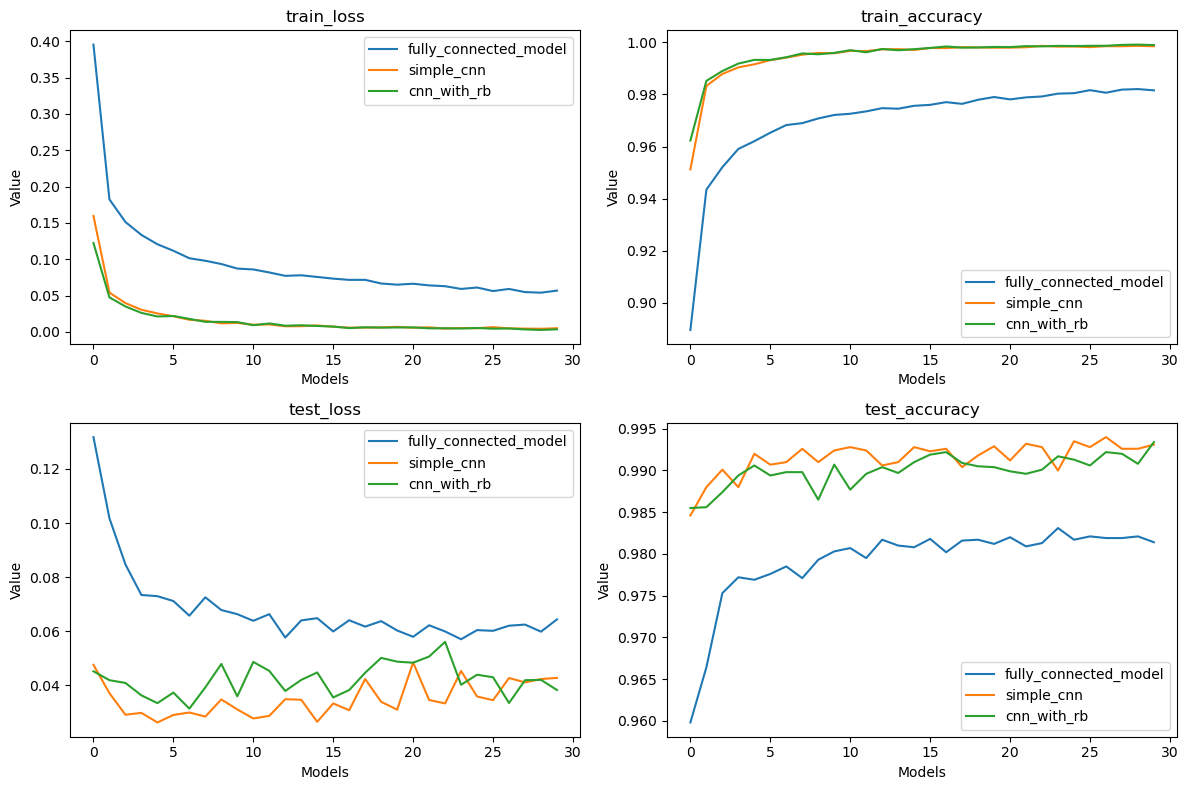

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (ax, metric, name) in enumerate(zip(axes, metrics, metrics_name)):
  for data, mod_name in zip(metric, models_name):
      ax.plot(data, label=mod_name)
      ax.legend()
      ax.set_title(name)
      ax.set_xlabel('Models')
      ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

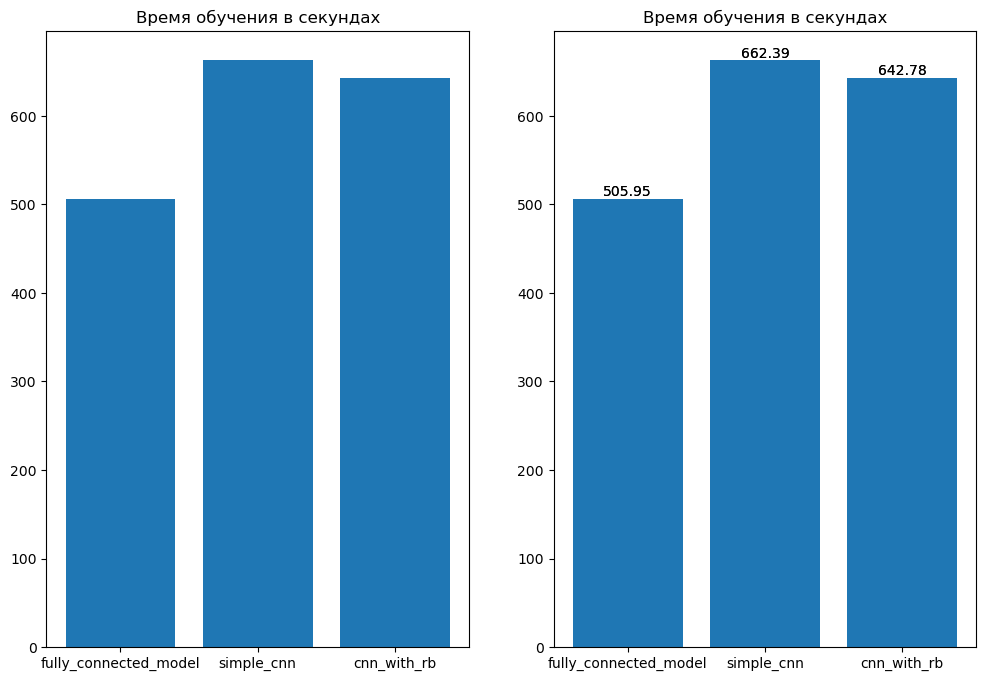

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
bars = ax1.bar(models_name, times)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

ax1.set_title("Время обучения в секундах")

bars = ax2.bar(models_name, times)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

ax2.set_title("Время обучения в секундах")
plt.show()

## 1.2 Сравнение на CIFAR-10

In [2]:
fully_connected_model = FullyConnectedModel(input_size=3072, num_classes=10).to("cuda")

simple_cnn = SimpleCNN(input_channels=3, data="c").to("cuda")

cnn_with_rb = CNNWithResidual(input_channels=3).to("cuda")

cifar_cnn = CIFARCNN().to("cuda")

models = [fully_connected_model, simple_cnn, cnn_with_rb, cifar_cnn]
models_name = ["fully_connected_model", "simple_cnn", "cnn_with_rb", "cifar_cnn"]

In [3]:
train_data, test_data = get_cifar_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [4]:
metric_train_loss = []
metric_train_acc = []
metric_test_loss = []
metric_test_acc = []
times = []

for model in models:
  start = time.time()
  history = train_model(model, train_data, test_data, epochs=30, device="cuda")
  end = time.time()

  times.append(end-start)

  metric_train_loss.append(history["train_losses"])
  metric_train_acc.append(history["train_accs"])
  metric_test_loss.append(history["test_losses"])
  metric_test_acc.append(history["test_accs"])

metrics = [metric_train_loss, metric_train_acc, metric_test_loss, metric_test_acc]
metrics_name = ["train_loss", "train_accuracy", "test_loss", "test_accuracy"]

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.87it/s]


Epoch 1/30:
Train Loss: 1.7715, Train Acc: 0.3638
Test Loss: 1.5489, Test Acc: 0.4473
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.82it/s]


Epoch 2/30:
Train Loss: 1.5943, Train Acc: 0.4286
Test Loss: 1.4541, Test Acc: 0.4838
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.55it/s]


Epoch 3/30:
Train Loss: 1.5280, Train Acc: 0.4530
Test Loss: 1.4155, Test Acc: 0.4976
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 69.07it/s]


Epoch 4/30:
Train Loss: 1.4846, Train Acc: 0.4694
Test Loss: 1.3811, Test Acc: 0.5091
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.28it/s]


Epoch 5/30:
Train Loss: 1.4513, Train Acc: 0.4788
Test Loss: 1.3624, Test Acc: 0.5192
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.34it/s]


Epoch 6/30:
Train Loss: 1.4236, Train Acc: 0.4900
Test Loss: 1.3443, Test Acc: 0.5166
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.51it/s]


Epoch 7/30:
Train Loss: 1.4050, Train Acc: 0.4981
Test Loss: 1.3403, Test Acc: 0.5142
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.27it/s]


Epoch 8/30:
Train Loss: 1.3839, Train Acc: 0.5019
Test Loss: 1.3207, Test Acc: 0.5316
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.99it/s]


Epoch 9/30:
Train Loss: 1.3664, Train Acc: 0.5110
Test Loss: 1.3122, Test Acc: 0.5338
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.74it/s]


Epoch 10/30:
Train Loss: 1.3501, Train Acc: 0.5184
Test Loss: 1.3032, Test Acc: 0.5407
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.07it/s]


Epoch 11/30:
Train Loss: 1.3344, Train Acc: 0.5234
Test Loss: 1.3021, Test Acc: 0.5329
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.61it/s]


Epoch 12/30:
Train Loss: 1.3203, Train Acc: 0.5299
Test Loss: 1.2966, Test Acc: 0.5355
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.69it/s]


Epoch 13/30:
Train Loss: 1.3090, Train Acc: 0.5340
Test Loss: 1.2932, Test Acc: 0.5359
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.21it/s]


Epoch 14/30:
Train Loss: 1.3010, Train Acc: 0.5358
Test Loss: 1.2812, Test Acc: 0.5428
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.76it/s]


Epoch 15/30:
Train Loss: 1.2872, Train Acc: 0.5416
Test Loss: 1.2782, Test Acc: 0.5428
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.95it/s]


Epoch 16/30:
Train Loss: 1.2779, Train Acc: 0.5439
Test Loss: 1.2761, Test Acc: 0.5401
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.01it/s]


Epoch 17/30:
Train Loss: 1.2712, Train Acc: 0.5455
Test Loss: 1.2761, Test Acc: 0.5429
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.51it/s]


Epoch 18/30:
Train Loss: 1.2638, Train Acc: 0.5478
Test Loss: 1.2770, Test Acc: 0.5415
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.71it/s]


Epoch 19/30:
Train Loss: 1.2565, Train Acc: 0.5537
Test Loss: 1.2660, Test Acc: 0.5443
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.61it/s]


Epoch 20/30:
Train Loss: 1.2505, Train Acc: 0.5546
Test Loss: 1.2698, Test Acc: 0.5432
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.32it/s]


Epoch 21/30:
Train Loss: 1.2396, Train Acc: 0.5586
Test Loss: 1.2614, Test Acc: 0.5468
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.33it/s]


Epoch 22/30:
Train Loss: 1.2320, Train Acc: 0.5609
Test Loss: 1.2605, Test Acc: 0.5461
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.15it/s]


Epoch 23/30:
Train Loss: 1.2316, Train Acc: 0.5598
Test Loss: 1.2681, Test Acc: 0.5446
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.69it/s]


Epoch 24/30:
Train Loss: 1.2197, Train Acc: 0.5666
Test Loss: 1.2690, Test Acc: 0.5476
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.56it/s]


Epoch 25/30:
Train Loss: 1.2153, Train Acc: 0.5676
Test Loss: 1.2621, Test Acc: 0.5495
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.68it/s]


Epoch 26/30:
Train Loss: 1.2092, Train Acc: 0.5665
Test Loss: 1.2675, Test Acc: 0.5463
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.81it/s]


Epoch 27/30:
Train Loss: 1.2055, Train Acc: 0.5682
Test Loss: 1.2555, Test Acc: 0.5464
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.11it/s]


Epoch 28/30:
Train Loss: 1.1992, Train Acc: 0.5719
Test Loss: 1.2551, Test Acc: 0.5473
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.08it/s]


Epoch 29/30:
Train Loss: 1.1873, Train Acc: 0.5762
Test Loss: 1.2560, Test Acc: 0.5499
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.10it/s]


Epoch 30/30:
Train Loss: 1.1872, Train Acc: 0.5782
Test Loss: 1.2513, Test Acc: 0.5521
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.95it/s]


Epoch 1/30:
Train Loss: 1.3002, Train Acc: 0.5307
Test Loss: 1.0058, Test Acc: 0.6449
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.22it/s]


Epoch 2/30:
Train Loss: 0.9267, Train Acc: 0.6741
Test Loss: 0.8723, Test Acc: 0.6963
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.57it/s]


Epoch 3/30:
Train Loss: 0.7698, Train Acc: 0.7309
Test Loss: 0.8163, Test Acc: 0.7130
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.16it/s]


Epoch 4/30:
Train Loss: 0.6493, Train Acc: 0.7721
Test Loss: 0.8071, Test Acc: 0.7250
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.53it/s]


Epoch 5/30:
Train Loss: 0.5454, Train Acc: 0.8062
Test Loss: 0.8171, Test Acc: 0.7277
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.47it/s]


Epoch 6/30:
Train Loss: 0.4513, Train Acc: 0.8402
Test Loss: 0.8135, Test Acc: 0.7377
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.93it/s]


Epoch 7/30:
Train Loss: 0.3828, Train Acc: 0.8625
Test Loss: 0.8515, Test Acc: 0.7400
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.17it/s]


Epoch 8/30:
Train Loss: 0.3160, Train Acc: 0.8871
Test Loss: 0.9032, Test Acc: 0.7360
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.16it/s]


Epoch 9/30:
Train Loss: 0.2604, Train Acc: 0.9070
Test Loss: 0.9612, Test Acc: 0.7371
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.67it/s]


Epoch 10/30:
Train Loss: 0.2281, Train Acc: 0.9185
Test Loss: 1.0215, Test Acc: 0.7350
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.98it/s]


Epoch 11/30:
Train Loss: 0.1958, Train Acc: 0.9299
Test Loss: 1.0907, Test Acc: 0.7348
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.24it/s]


Epoch 12/30:
Train Loss: 0.1835, Train Acc: 0.9344
Test Loss: 1.1500, Test Acc: 0.7259
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.25it/s]


Epoch 13/30:
Train Loss: 0.1643, Train Acc: 0.9410
Test Loss: 1.2129, Test Acc: 0.7304
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.73it/s]


Epoch 14/30:
Train Loss: 0.1471, Train Acc: 0.9483
Test Loss: 1.2492, Test Acc: 0.7343
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.38it/s]


Epoch 15/30:
Train Loss: 0.1353, Train Acc: 0.9516
Test Loss: 1.3551, Test Acc: 0.7247
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.56it/s]


Epoch 16/30:
Train Loss: 0.1293, Train Acc: 0.9542
Test Loss: 1.3751, Test Acc: 0.7305
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 70.15it/s]


Epoch 17/30:
Train Loss: 0.1266, Train Acc: 0.9553
Test Loss: 1.4802, Test Acc: 0.7285
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.62it/s]


Epoch 18/30:
Train Loss: 0.1240, Train Acc: 0.9569
Test Loss: 1.4379, Test Acc: 0.7304
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.03it/s]


Epoch 19/30:
Train Loss: 0.1105, Train Acc: 0.9620
Test Loss: 1.4879, Test Acc: 0.7315
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.42it/s]


Epoch 20/30:
Train Loss: 0.1145, Train Acc: 0.9606
Test Loss: 1.5237, Test Acc: 0.7283
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.53it/s]


Epoch 21/30:
Train Loss: 0.1060, Train Acc: 0.9635
Test Loss: 1.6548, Test Acc: 0.7235
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.60it/s]


Epoch 22/30:
Train Loss: 0.1017, Train Acc: 0.9655
Test Loss: 1.6340, Test Acc: 0.7244
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.82it/s]


Epoch 23/30:
Train Loss: 0.0963, Train Acc: 0.9664
Test Loss: 1.6627, Test Acc: 0.7207
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.23it/s]


Epoch 24/30:
Train Loss: 0.1063, Train Acc: 0.9637
Test Loss: 1.6702, Test Acc: 0.7304
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.59it/s]


Epoch 25/30:
Train Loss: 0.0913, Train Acc: 0.9687
Test Loss: 1.7005, Test Acc: 0.7286
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.84it/s]


Epoch 26/30:
Train Loss: 0.0940, Train Acc: 0.9682
Test Loss: 1.6155, Test Acc: 0.7331
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.80it/s]


Epoch 27/30:
Train Loss: 0.0886, Train Acc: 0.9686
Test Loss: 1.7961, Test Acc: 0.7285
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.03it/s]


Epoch 28/30:
Train Loss: 0.0866, Train Acc: 0.9700
Test Loss: 1.7405, Test Acc: 0.7250
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.98it/s]


Epoch 29/30:
Train Loss: 0.0903, Train Acc: 0.9690
Test Loss: 1.7770, Test Acc: 0.7265
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.21it/s]


Epoch 30/30:
Train Loss: 0.0885, Train Acc: 0.9702
Test Loss: 1.7418, Test Acc: 0.7243
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.31it/s]


Epoch 1/30:
Train Loss: 1.3453, Train Acc: 0.5132
Test Loss: 1.1271, Test Acc: 0.5948
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.10it/s]


Epoch 2/30:
Train Loss: 0.9597, Train Acc: 0.6580
Test Loss: 0.9423, Test Acc: 0.6666
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.40it/s]


Epoch 3/30:
Train Loss: 0.7881, Train Acc: 0.7211
Test Loss: 0.8584, Test Acc: 0.6940
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 51.21it/s]


Epoch 4/30:
Train Loss: 0.6675, Train Acc: 0.7630
Test Loss: 0.8489, Test Acc: 0.7090
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.24it/s]


Epoch 5/30:
Train Loss: 0.5750, Train Acc: 0.7950
Test Loss: 0.8206, Test Acc: 0.7226
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.03it/s]


Epoch 6/30:
Train Loss: 0.4951, Train Acc: 0.8222
Test Loss: 0.8414, Test Acc: 0.7216
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.91it/s]


Epoch 7/30:
Train Loss: 0.4265, Train Acc: 0.8479
Test Loss: 0.8348, Test Acc: 0.7319
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.17it/s]


Epoch 8/30:
Train Loss: 0.3606, Train Acc: 0.8701
Test Loss: 0.8716, Test Acc: 0.7352
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.51it/s]


Epoch 9/30:
Train Loss: 0.3073, Train Acc: 0.8902
Test Loss: 0.9849, Test Acc: 0.7171
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.91it/s]


Epoch 10/30:
Train Loss: 0.2675, Train Acc: 0.9046
Test Loss: 1.0105, Test Acc: 0.7245
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.75it/s]


Epoch 11/30:
Train Loss: 0.2317, Train Acc: 0.9164
Test Loss: 1.0703, Test Acc: 0.7275
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.17it/s]


Epoch 12/30:
Train Loss: 0.2077, Train Acc: 0.9252
Test Loss: 1.1511, Test Acc: 0.7226
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.94it/s]


Epoch 13/30:
Train Loss: 0.1828, Train Acc: 0.9351
Test Loss: 1.2095, Test Acc: 0.7200
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.75it/s]


Epoch 14/30:
Train Loss: 0.1603, Train Acc: 0.9414
Test Loss: 1.2260, Test Acc: 0.7228
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.21it/s]


Epoch 15/30:
Train Loss: 0.1513, Train Acc: 0.9449
Test Loss: 1.2474, Test Acc: 0.7287
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.44it/s]


Epoch 16/30:
Train Loss: 0.1344, Train Acc: 0.9517
Test Loss: 1.3655, Test Acc: 0.7166
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.10it/s]


Epoch 17/30:
Train Loss: 0.1286, Train Acc: 0.9535
Test Loss: 1.3898, Test Acc: 0.7193
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.04it/s]


Epoch 18/30:
Train Loss: 0.1209, Train Acc: 0.9564
Test Loss: 1.3791, Test Acc: 0.7284
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.83it/s]


Epoch 19/30:
Train Loss: 0.1189, Train Acc: 0.9581
Test Loss: 1.4220, Test Acc: 0.7268
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.17it/s]


Epoch 20/30:
Train Loss: 0.0987, Train Acc: 0.9643
Test Loss: 1.5007, Test Acc: 0.7200
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.07it/s]


Epoch 21/30:
Train Loss: 0.1048, Train Acc: 0.9619
Test Loss: 1.5123, Test Acc: 0.7270
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.49it/s]


Epoch 22/30:
Train Loss: 0.1008, Train Acc: 0.9644
Test Loss: 1.4667, Test Acc: 0.7316
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.87it/s]


Epoch 23/30:
Train Loss: 0.0851, Train Acc: 0.9699
Test Loss: 1.5555, Test Acc: 0.7205
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.11it/s]


Epoch 24/30:
Train Loss: 0.0936, Train Acc: 0.9666
Test Loss: 1.6263, Test Acc: 0.7221
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.58it/s]


Epoch 25/30:
Train Loss: 0.0876, Train Acc: 0.9683
Test Loss: 1.5694, Test Acc: 0.7234
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.18it/s]


Epoch 26/30:
Train Loss: 0.0764, Train Acc: 0.9730
Test Loss: 1.6251, Test Acc: 0.7256
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.87it/s]


Epoch 27/30:
Train Loss: 0.0839, Train Acc: 0.9707
Test Loss: 1.6326, Test Acc: 0.7225
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 50.84it/s]


Epoch 28/30:
Train Loss: 0.0833, Train Acc: 0.9709
Test Loss: 1.5667, Test Acc: 0.7288
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 51.08it/s]


Epoch 29/30:
Train Loss: 0.0685, Train Acc: 0.9754
Test Loss: 1.6308, Test Acc: 0.7263
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 51.91it/s]


Epoch 30/30:
Train Loss: 0.0672, Train Acc: 0.9765
Test Loss: 1.7033, Test Acc: 0.7318
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.38it/s]


Epoch 1/30:
Train Loss: 1.3659, Train Acc: 0.5058
Test Loss: 1.0133, Test Acc: 0.6412
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.03it/s]


Epoch 2/30:
Train Loss: 0.9404, Train Acc: 0.6718
Test Loss: 0.8723, Test Acc: 0.6924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.21it/s]


Epoch 3/30:
Train Loss: 0.7681, Train Acc: 0.7337
Test Loss: 0.7492, Test Acc: 0.7350
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.35it/s]


Epoch 4/30:
Train Loss: 0.6527, Train Acc: 0.7730
Test Loss: 0.7276, Test Acc: 0.7438
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.86it/s]


Epoch 5/30:
Train Loss: 0.5749, Train Acc: 0.7992
Test Loss: 0.7041, Test Acc: 0.7567
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.03it/s]


Epoch 6/30:
Train Loss: 0.4993, Train Acc: 0.8234
Test Loss: 0.7140, Test Acc: 0.7580
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 51.97it/s]


Epoch 7/30:
Train Loss: 0.4320, Train Acc: 0.8477
Test Loss: 0.7186, Test Acc: 0.7589
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.35it/s]


Epoch 8/30:
Train Loss: 0.3710, Train Acc: 0.8681
Test Loss: 0.8096, Test Acc: 0.7616
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.43it/s]


Epoch 9/30:
Train Loss: 0.3319, Train Acc: 0.8799
Test Loss: 0.8096, Test Acc: 0.7614
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.26it/s]


Epoch 10/30:
Train Loss: 0.2980, Train Acc: 0.8930
Test Loss: 0.8406, Test Acc: 0.7625
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.89it/s]


Epoch 11/30:
Train Loss: 0.2608, Train Acc: 0.9058
Test Loss: 0.9048, Test Acc: 0.7515
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.41it/s]


Epoch 12/30:
Train Loss: 0.2371, Train Acc: 0.9149
Test Loss: 0.9474, Test Acc: 0.7563
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.97it/s]


Epoch 13/30:
Train Loss: 0.2100, Train Acc: 0.9253
Test Loss: 0.9499, Test Acc: 0.7629
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.17it/s]


Epoch 14/30:
Train Loss: 0.2042, Train Acc: 0.9265
Test Loss: 1.0358, Test Acc: 0.7534
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 51.89it/s]


Epoch 15/30:
Train Loss: 0.1897, Train Acc: 0.9301
Test Loss: 1.0295, Test Acc: 0.7667
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.14it/s]


Epoch 16/30:
Train Loss: 0.1769, Train Acc: 0.9371
Test Loss: 1.1043, Test Acc: 0.7645
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.78it/s]


Epoch 17/30:
Train Loss: 0.1648, Train Acc: 0.9407
Test Loss: 1.1498, Test Acc: 0.7557
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.95it/s]


Epoch 18/30:
Train Loss: 0.1598, Train Acc: 0.9435
Test Loss: 1.2374, Test Acc: 0.7526
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.48it/s]


Epoch 19/30:
Train Loss: 0.1491, Train Acc: 0.9468
Test Loss: 1.2631, Test Acc: 0.7573
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.08it/s]


Epoch 20/30:
Train Loss: 0.1441, Train Acc: 0.9481
Test Loss: 1.2740, Test Acc: 0.7597
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.43it/s]


Epoch 21/30:
Train Loss: 0.1457, Train Acc: 0.9493
Test Loss: 1.2541, Test Acc: 0.7617
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.83it/s]


Epoch 22/30:
Train Loss: 0.1319, Train Acc: 0.9536
Test Loss: 1.2255, Test Acc: 0.7590
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 52.75it/s]


Epoch 23/30:
Train Loss: 0.1348, Train Acc: 0.9531
Test Loss: 1.3067, Test Acc: 0.7476
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.15it/s]


Epoch 24/30:
Train Loss: 0.1331, Train Acc: 0.9537
Test Loss: 1.3133, Test Acc: 0.7542
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.43it/s]


Epoch 25/30:
Train Loss: 0.1240, Train Acc: 0.9564
Test Loss: 1.4561, Test Acc: 0.7525
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.39it/s]


Epoch 26/30:
Train Loss: 0.1222, Train Acc: 0.9578
Test Loss: 1.4459, Test Acc: 0.7564
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.88it/s]


Epoch 27/30:
Train Loss: 0.1208, Train Acc: 0.9577
Test Loss: 1.4217, Test Acc: 0.7552
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.16it/s]


Epoch 28/30:
Train Loss: 0.1173, Train Acc: 0.9592
Test Loss: 1.3949, Test Acc: 0.7598
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.46it/s]


Epoch 29/30:
Train Loss: 0.1157, Train Acc: 0.9602
Test Loss: 1.4755, Test Acc: 0.7630
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 51.40it/s]

Epoch 30/30:
Train Loss: 0.1124, Train Acc: 0.9618
Test Loss: 1.4429, Test Acc: 0.7634
--------------------------------------------------


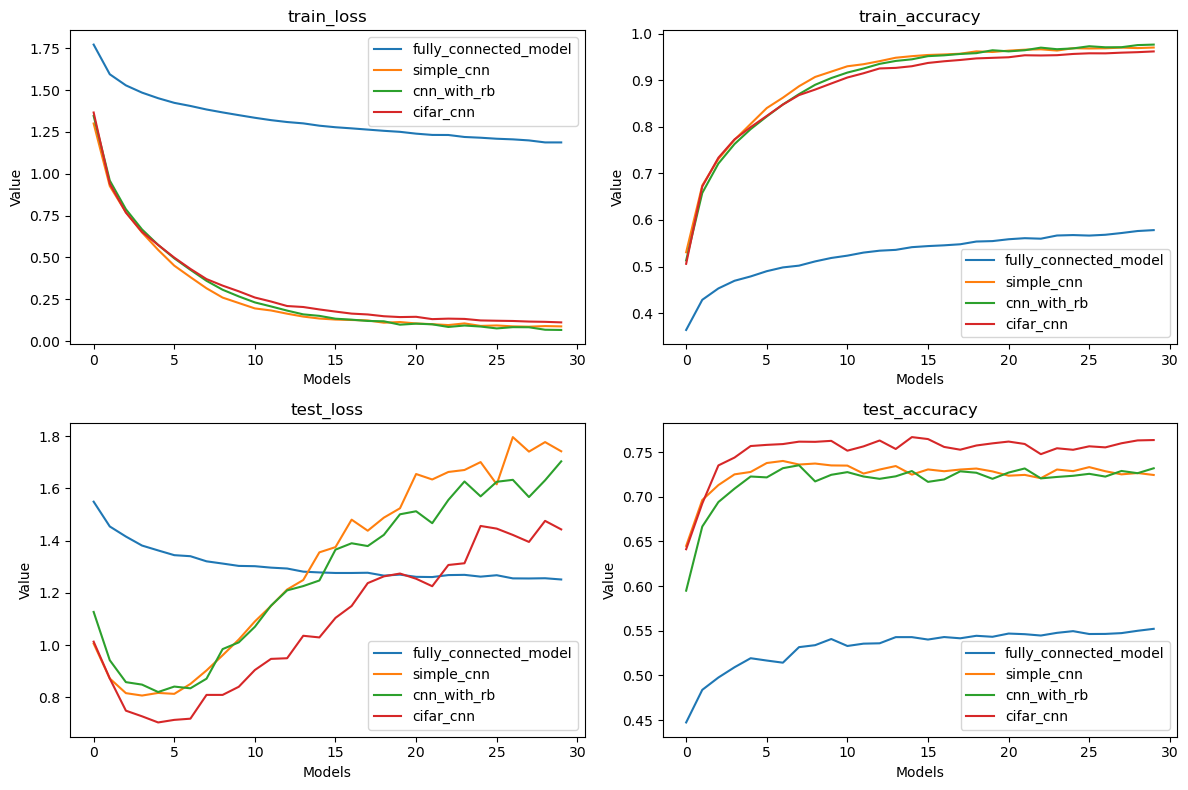

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (ax, metric, name) in enumerate(zip(axes, metrics, metrics_name)):
  for data, mod_name in zip(metric, models_name):
      ax.plot(data, label=mod_name)
      ax.legend()
      ax.set_title(name)
      ax.set_xlabel('Models')
      ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

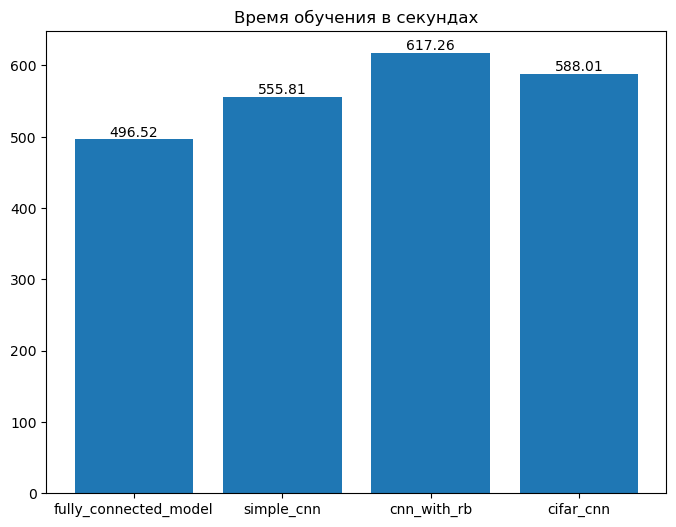

In [6]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models_name, times)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.title("Время обучения в секундах")
plt.show()

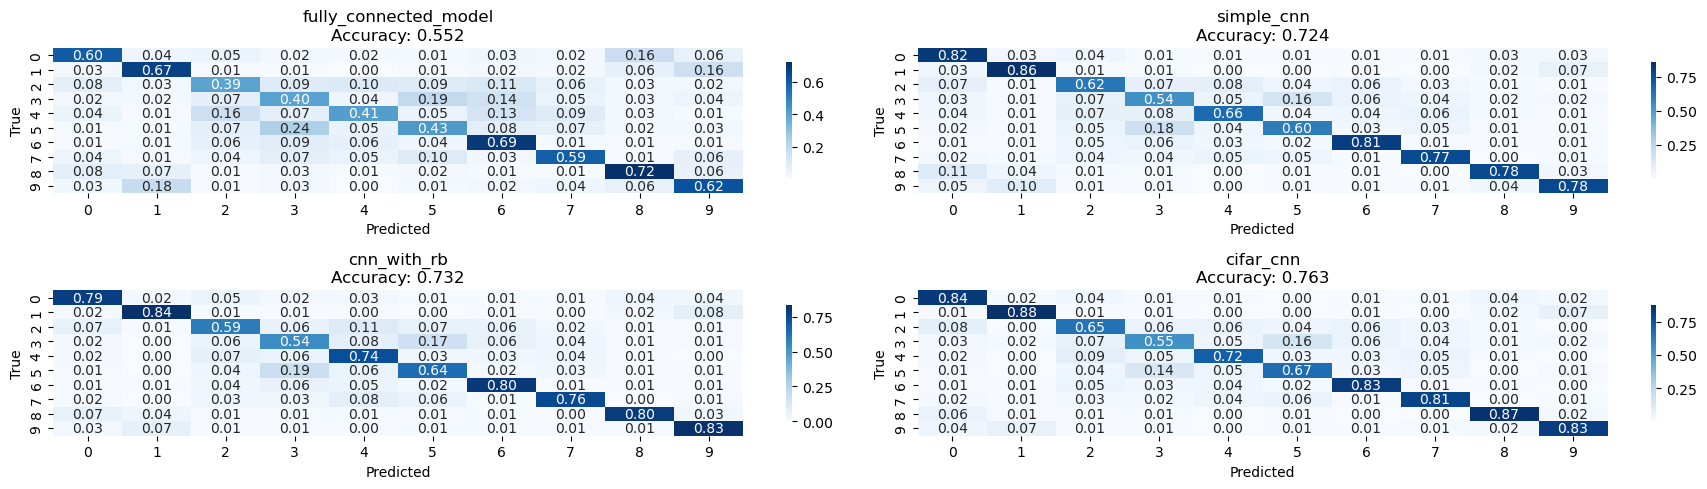

In [16]:
plot_confusion_matrix_for_models(models, models_name, test_data)

## Задание 2: Анализ архитектур CNN

### 2.1 Влияние размера ядра свертки

In [17]:
cnn_model3 = SimpleCNN(kernel1=3, kernel2=3).to("cuda")

cnn_model5 = SimpleCNN(kernel1=5, kernel2=5, padding1=2, padding2=2).to("cuda")

cnn_model7 = SimpleCNN(kernel1=7, kernel2=7, padding1=3, padding2=3).to("cuda")

comb_cnn_model13 = SimpleCNN(kernel1=1, kernel2=3).to("cuda")

comb_cnn_model57 = SimpleCNN(kernel1=5, kernel2=7, padding1=2, padding2=3).to("cuda")

models = [cnn_model3, cnn_model5, cnn_model7, comb_cnn_model13, comb_cnn_model57]
models_name = ["kernel3", "kernel5", "kernel7", "kernel1x3", "kernel5x7"]

In [4]:
train_data, test_data = get_mnist_loaders()

In [19]:
metric_train_loss = []
metric_train_acc = []
metric_test_loss = []
metric_test_acc = []
times = []

for model in models:
  start = time.time()
  history = train_model(model, train_data, test_data, epochs=30, device="cuda")
  end = time.time()

  times.append(end-start)

  metric_train_loss.append(history["train_losses"])
  metric_train_acc.append(history["train_accs"])
  metric_test_loss.append(history["test_losses"])
  metric_test_acc.append(history["test_accs"])

metrics = [metric_train_loss, metric_train_acc, metric_test_loss, metric_test_acc]
metrics_name = ["train_loss", "train_accuracy", "test_loss", "test_accuracy"]

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.56it/s]


Epoch 1/30:
Train Loss: 0.1590, Train Acc: 0.9512
Test Loss: 0.0452, Test Acc: 0.9852
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.63it/s]


Epoch 2/30:
Train Loss: 0.0547, Train Acc: 0.9837
Test Loss: 0.0303, Test Acc: 0.9901
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.55it/s]


Epoch 3/30:
Train Loss: 0.0399, Train Acc: 0.9874
Test Loss: 0.0300, Test Acc: 0.9902
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.71it/s]


Epoch 4/30:
Train Loss: 0.0301, Train Acc: 0.9900
Test Loss: 0.0258, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 43.95it/s]


Epoch 5/30:
Train Loss: 0.0250, Train Acc: 0.9922
Test Loss: 0.0268, Test Acc: 0.9921
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.62it/s]


Epoch 6/30:
Train Loss: 0.0199, Train Acc: 0.9934
Test Loss: 0.0260, Test Acc: 0.9912
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.09it/s]


Epoch 7/30:
Train Loss: 0.0177, Train Acc: 0.9941
Test Loss: 0.0254, Test Acc: 0.9912
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.92it/s]


Epoch 8/30:
Train Loss: 0.0148, Train Acc: 0.9951
Test Loss: 0.0314, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.09it/s]


Epoch 9/30:
Train Loss: 0.0137, Train Acc: 0.9954
Test Loss: 0.0325, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.76it/s]


Epoch 10/30:
Train Loss: 0.0118, Train Acc: 0.9959
Test Loss: 0.0291, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.24it/s]


Epoch 11/30:
Train Loss: 0.0116, Train Acc: 0.9961
Test Loss: 0.0286, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.02it/s]


Epoch 12/30:
Train Loss: 0.0090, Train Acc: 0.9969
Test Loss: 0.0353, Test Acc: 0.9915
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.33it/s]


Epoch 13/30:
Train Loss: 0.0100, Train Acc: 0.9966
Test Loss: 0.0334, Test Acc: 0.9918
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.30it/s]


Epoch 14/30:
Train Loss: 0.0090, Train Acc: 0.9968
Test Loss: 0.0332, Test Acc: 0.9927
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.02it/s]


Epoch 15/30:
Train Loss: 0.0097, Train Acc: 0.9968
Test Loss: 0.0364, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.58it/s]


Epoch 16/30:
Train Loss: 0.0067, Train Acc: 0.9978
Test Loss: 0.0348, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.90it/s]


Epoch 17/30:
Train Loss: 0.0080, Train Acc: 0.9973
Test Loss: 0.0377, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.79it/s]


Epoch 18/30:
Train Loss: 0.0052, Train Acc: 0.9984
Test Loss: 0.0347, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.74it/s]


Epoch 19/30:
Train Loss: 0.0065, Train Acc: 0.9979
Test Loss: 0.0379, Test Acc: 0.9918
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.46it/s]


Epoch 20/30:
Train Loss: 0.0063, Train Acc: 0.9978
Test Loss: 0.0388, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.17it/s]


Epoch 21/30:
Train Loss: 0.0072, Train Acc: 0.9980
Test Loss: 0.0263, Test Acc: 0.9937
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.29it/s]


Epoch 22/30:
Train Loss: 0.0050, Train Acc: 0.9984
Test Loss: 0.0329, Test Acc: 0.9934
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.05it/s]


Epoch 23/30:
Train Loss: 0.0049, Train Acc: 0.9984
Test Loss: 0.0450, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.13it/s]


Epoch 24/30:
Train Loss: 0.0051, Train Acc: 0.9982
Test Loss: 0.0390, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.32it/s]


Epoch 25/30:
Train Loss: 0.0064, Train Acc: 0.9980
Test Loss: 0.0394, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.14it/s]


Epoch 26/30:
Train Loss: 0.0052, Train Acc: 0.9983
Test Loss: 0.0368, Test Acc: 0.9932
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.14it/s]


Epoch 27/30:
Train Loss: 0.0046, Train Acc: 0.9987
Test Loss: 0.0431, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.99it/s]


Epoch 28/30:
Train Loss: 0.0056, Train Acc: 0.9983
Test Loss: 0.0394, Test Acc: 0.9934
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.36it/s]


Epoch 29/30:
Train Loss: 0.0039, Train Acc: 0.9989
Test Loss: 0.0493, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.69it/s]


Epoch 30/30:
Train Loss: 0.0058, Train Acc: 0.9983
Test Loss: 0.0395, Test Acc: 0.9930
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.21it/s]


Epoch 1/30:
Train Loss: 0.1475, Train Acc: 0.9546
Test Loss: 0.0357, Test Acc: 0.9880
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.73it/s]


Epoch 2/30:
Train Loss: 0.0491, Train Acc: 0.9849
Test Loss: 0.0259, Test Acc: 0.9921
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.32it/s]


Epoch 3/30:
Train Loss: 0.0360, Train Acc: 0.9882
Test Loss: 0.0240, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.15it/s]


Epoch 4/30:
Train Loss: 0.0285, Train Acc: 0.9911
Test Loss: 0.0259, Test Acc: 0.9909
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.52it/s]


Epoch 5/30:
Train Loss: 0.0224, Train Acc: 0.9930
Test Loss: 0.0292, Test Acc: 0.9919
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.64it/s]


Epoch 6/30:
Train Loss: 0.0189, Train Acc: 0.9941
Test Loss: 0.0236, Test Acc: 0.9921
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.07it/s]


Epoch 7/30:
Train Loss: 0.0162, Train Acc: 0.9949
Test Loss: 0.0284, Test Acc: 0.9913
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.08it/s]


Epoch 8/30:
Train Loss: 0.0152, Train Acc: 0.9950
Test Loss: 0.0214, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.42it/s]


Epoch 9/30:
Train Loss: 0.0127, Train Acc: 0.9957
Test Loss: 0.0285, Test Acc: 0.9914
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.52it/s]


Epoch 10/30:
Train Loss: 0.0114, Train Acc: 0.9962
Test Loss: 0.0353, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.29it/s]


Epoch 11/30:
Train Loss: 0.0115, Train Acc: 0.9963
Test Loss: 0.0259, Test Acc: 0.9933
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.90it/s]


Epoch 12/30:
Train Loss: 0.0093, Train Acc: 0.9971
Test Loss: 0.0336, Test Acc: 0.9914
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.09it/s]


Epoch 13/30:
Train Loss: 0.0096, Train Acc: 0.9969
Test Loss: 0.0291, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.29it/s]


Epoch 14/30:
Train Loss: 0.0069, Train Acc: 0.9980
Test Loss: 0.0270, Test Acc: 0.9939
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.08it/s]


Epoch 15/30:
Train Loss: 0.0087, Train Acc: 0.9973
Test Loss: 0.0340, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.70it/s]


Epoch 16/30:
Train Loss: 0.0080, Train Acc: 0.9976
Test Loss: 0.0492, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.16it/s]


Epoch 17/30:
Train Loss: 0.0083, Train Acc: 0.9975
Test Loss: 0.0323, Test Acc: 0.9929
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.40it/s]


Epoch 18/30:
Train Loss: 0.0058, Train Acc: 0.9980
Test Loss: 0.0375, Test Acc: 0.9931
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.19it/s]


Epoch 19/30:
Train Loss: 0.0060, Train Acc: 0.9981
Test Loss: 0.0394, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.49it/s]


Epoch 20/30:
Train Loss: 0.0068, Train Acc: 0.9980
Test Loss: 0.0367, Test Acc: 0.9929
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.81it/s]


Epoch 21/30:
Train Loss: 0.0076, Train Acc: 0.9977
Test Loss: 0.0397, Test Acc: 0.9929
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.78it/s]


Epoch 22/30:
Train Loss: 0.0059, Train Acc: 0.9982
Test Loss: 0.0405, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.59it/s]


Epoch 23/30:
Train Loss: 0.0047, Train Acc: 0.9985
Test Loss: 0.0384, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.74it/s]


Epoch 24/30:
Train Loss: 0.0072, Train Acc: 0.9981
Test Loss: 0.0441, Test Acc: 0.9916
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.90it/s]


Epoch 25/30:
Train Loss: 0.0062, Train Acc: 0.9981
Test Loss: 0.0560, Test Acc: 0.9908
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.10it/s]


Epoch 26/30:
Train Loss: 0.0058, Train Acc: 0.9982
Test Loss: 0.0422, Test Acc: 0.9935
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.30it/s]


Epoch 27/30:
Train Loss: 0.0063, Train Acc: 0.9983
Test Loss: 0.0526, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.08it/s]


Epoch 28/30:
Train Loss: 0.0065, Train Acc: 0.9981
Test Loss: 0.0376, Test Acc: 0.9934
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.49it/s]


Epoch 29/30:
Train Loss: 0.0046, Train Acc: 0.9986
Test Loss: 0.0500, Test Acc: 0.9927
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.87it/s]


Epoch 30/30:
Train Loss: 0.0049, Train Acc: 0.9984
Test Loss: 0.0465, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.54it/s]


Epoch 1/30:
Train Loss: 0.1408, Train Acc: 0.9564
Test Loss: 0.0645, Test Acc: 0.9798
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.37it/s]


Epoch 2/30:
Train Loss: 0.0506, Train Acc: 0.9848
Test Loss: 0.0268, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.74it/s]


Epoch 3/30:
Train Loss: 0.0347, Train Acc: 0.9892
Test Loss: 0.0288, Test Acc: 0.9905
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.17it/s]


Epoch 4/30:
Train Loss: 0.0275, Train Acc: 0.9916
Test Loss: 0.0333, Test Acc: 0.9904
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.47it/s]


Epoch 5/30:
Train Loss: 0.0229, Train Acc: 0.9928
Test Loss: 0.0241, Test Acc: 0.9929
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.76it/s]


Epoch 6/30:
Train Loss: 0.0205, Train Acc: 0.9935
Test Loss: 0.0301, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.31it/s]


Epoch 7/30:
Train Loss: 0.0176, Train Acc: 0.9945
Test Loss: 0.0284, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.50it/s]


Epoch 8/30:
Train Loss: 0.0148, Train Acc: 0.9953
Test Loss: 0.0288, Test Acc: 0.9915
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.22it/s]


Epoch 9/30:
Train Loss: 0.0140, Train Acc: 0.9954
Test Loss: 0.0347, Test Acc: 0.9912
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.47it/s]


Epoch 10/30:
Train Loss: 0.0130, Train Acc: 0.9956
Test Loss: 0.0287, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.82it/s]


Epoch 11/30:
Train Loss: 0.0114, Train Acc: 0.9964
Test Loss: 0.0424, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.92it/s]


Epoch 12/30:
Train Loss: 0.0107, Train Acc: 0.9966
Test Loss: 0.0297, Test Acc: 0.9929
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.45it/s]


Epoch 13/30:
Train Loss: 0.0103, Train Acc: 0.9970
Test Loss: 0.0348, Test Acc: 0.9915
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.02it/s]


Epoch 14/30:
Train Loss: 0.0106, Train Acc: 0.9967
Test Loss: 0.0421, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.23it/s]


Epoch 15/30:
Train Loss: 0.0095, Train Acc: 0.9971
Test Loss: 0.0351, Test Acc: 0.9930
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.04it/s]


Epoch 16/30:
Train Loss: 0.0069, Train Acc: 0.9979
Test Loss: 0.0464, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.04it/s]


Epoch 17/30:
Train Loss: 0.0122, Train Acc: 0.9967
Test Loss: 0.0321, Test Acc: 0.9919
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.97it/s]


Epoch 18/30:
Train Loss: 0.0066, Train Acc: 0.9978
Test Loss: 0.0421, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.24it/s]


Epoch 19/30:
Train Loss: 0.0084, Train Acc: 0.9975
Test Loss: 0.0581, Test Acc: 0.9905
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 50.15it/s]


Epoch 20/30:
Train Loss: 0.0094, Train Acc: 0.9974
Test Loss: 0.0488, Test Acc: 0.9919
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.19it/s]


Epoch 21/30:
Train Loss: 0.0054, Train Acc: 0.9983
Test Loss: 0.0388, Test Acc: 0.9933
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.35it/s]


Epoch 22/30:
Train Loss: 0.0055, Train Acc: 0.9983
Test Loss: 0.0424, Test Acc: 0.9936
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.57it/s]


Epoch 23/30:
Train Loss: 0.0095, Train Acc: 0.9978
Test Loss: 0.0595, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.41it/s]


Epoch 24/30:
Train Loss: 0.0095, Train Acc: 0.9977
Test Loss: 0.0590, Test Acc: 0.9908
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.25it/s]


Epoch 25/30:
Train Loss: 0.0058, Train Acc: 0.9984
Test Loss: 0.0518, Test Acc: 0.9932
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.38it/s]


Epoch 26/30:
Train Loss: 0.0074, Train Acc: 0.9980
Test Loss: 0.0626, Test Acc: 0.9916
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.65it/s]


Epoch 27/30:
Train Loss: 0.0100, Train Acc: 0.9972
Test Loss: 0.0477, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.31it/s]


Epoch 28/30:
Train Loss: 0.0061, Train Acc: 0.9982
Test Loss: 0.0698, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.84it/s]


Epoch 29/30:
Train Loss: 0.0087, Train Acc: 0.9981
Test Loss: 0.0579, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.43it/s]


Epoch 30/30:
Train Loss: 0.0061, Train Acc: 0.9985
Test Loss: 0.0749, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.36it/s]


Epoch 1/30:
Train Loss: 0.2001, Train Acc: 0.9378
Test Loss: 0.0575, Test Acc: 0.9811
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.00it/s]


Epoch 2/30:
Train Loss: 0.0773, Train Acc: 0.9760
Test Loss: 0.0505, Test Acc: 0.9831
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.50it/s]


Epoch 3/30:
Train Loss: 0.0598, Train Acc: 0.9812
Test Loss: 0.0464, Test Acc: 0.9849
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.51it/s]


Epoch 4/30:
Train Loss: 0.0480, Train Acc: 0.9848
Test Loss: 0.0452, Test Acc: 0.9850
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.52it/s]


Epoch 5/30:
Train Loss: 0.0407, Train Acc: 0.9869
Test Loss: 0.0425, Test Acc: 0.9869
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.42it/s]


Epoch 6/30:
Train Loss: 0.0353, Train Acc: 0.9882
Test Loss: 0.0437, Test Acc: 0.9849
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.40it/s]


Epoch 7/30:
Train Loss: 0.0289, Train Acc: 0.9905
Test Loss: 0.0404, Test Acc: 0.9869
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.56it/s]


Epoch 8/30:
Train Loss: 0.0281, Train Acc: 0.9905
Test Loss: 0.0397, Test Acc: 0.9874
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.11it/s]


Epoch 9/30:
Train Loss: 0.0234, Train Acc: 0.9923
Test Loss: 0.0491, Test Acc: 0.9852
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.18it/s]


Epoch 10/30:
Train Loss: 0.0229, Train Acc: 0.9920
Test Loss: 0.0405, Test Acc: 0.9881
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.42it/s]


Epoch 11/30:
Train Loss: 0.0191, Train Acc: 0.9939
Test Loss: 0.0413, Test Acc: 0.9881
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.46it/s]


Epoch 12/30:
Train Loss: 0.0180, Train Acc: 0.9942
Test Loss: 0.0539, Test Acc: 0.9863
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.82it/s]


Epoch 13/30:
Train Loss: 0.0174, Train Acc: 0.9938
Test Loss: 0.0486, Test Acc: 0.9857
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.04it/s]


Epoch 14/30:
Train Loss: 0.0148, Train Acc: 0.9951
Test Loss: 0.0532, Test Acc: 0.9860
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.80it/s]


Epoch 15/30:
Train Loss: 0.0159, Train Acc: 0.9948
Test Loss: 0.0479, Test Acc: 0.9876
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.48it/s]


Epoch 16/30:
Train Loss: 0.0141, Train Acc: 0.9953
Test Loss: 0.0408, Test Acc: 0.9881
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.90it/s]


Epoch 17/30:
Train Loss: 0.0129, Train Acc: 0.9956
Test Loss: 0.0534, Test Acc: 0.9881
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.01it/s]


Epoch 18/30:
Train Loss: 0.0131, Train Acc: 0.9956
Test Loss: 0.0555, Test Acc: 0.9873
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.82it/s]


Epoch 19/30:
Train Loss: 0.0106, Train Acc: 0.9963
Test Loss: 0.0538, Test Acc: 0.9871
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.63it/s]


Epoch 20/30:
Train Loss: 0.0111, Train Acc: 0.9962
Test Loss: 0.0534, Test Acc: 0.9872
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 49.50it/s]


Epoch 21/30:
Train Loss: 0.0110, Train Acc: 0.9960
Test Loss: 0.0601, Test Acc: 0.9860
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 75.02it/s]


Epoch 22/30:
Train Loss: 0.0080, Train Acc: 0.9974
Test Loss: 0.0640, Test Acc: 0.9871
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.23it/s]


Epoch 23/30:
Train Loss: 0.0120, Train Acc: 0.9960
Test Loss: 0.0632, Test Acc: 0.9875
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.98it/s]


Epoch 24/30:
Train Loss: 0.0097, Train Acc: 0.9966
Test Loss: 0.0480, Test Acc: 0.9893
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.02it/s]


Epoch 25/30:
Train Loss: 0.0086, Train Acc: 0.9969
Test Loss: 0.0605, Test Acc: 0.9869
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.02it/s]


Epoch 26/30:
Train Loss: 0.0086, Train Acc: 0.9971
Test Loss: 0.0541, Test Acc: 0.9881
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 53.93it/s]


Epoch 27/30:
Train Loss: 0.0080, Train Acc: 0.9973
Test Loss: 0.0603, Test Acc: 0.9872
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.94it/s]


Epoch 28/30:
Train Loss: 0.0081, Train Acc: 0.9975
Test Loss: 0.0614, Test Acc: 0.9887
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.88it/s]


Epoch 29/30:
Train Loss: 0.0088, Train Acc: 0.9970
Test Loss: 0.0525, Test Acc: 0.9891
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.49it/s]


Epoch 30/30:
Train Loss: 0.0087, Train Acc: 0.9971
Test Loss: 0.0627, Test Acc: 0.9881
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.85it/s]


Epoch 1/30:
Train Loss: 0.1345, Train Acc: 0.9584
Test Loss: 0.0346, Test Acc: 0.9882
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.87it/s]


Epoch 2/30:
Train Loss: 0.0475, Train Acc: 0.9853
Test Loss: 0.0322, Test Acc: 0.9894
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.93it/s]


Epoch 3/30:
Train Loss: 0.0340, Train Acc: 0.9896
Test Loss: 0.0307, Test Acc: 0.9903
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.86it/s]


Epoch 4/30:
Train Loss: 0.0249, Train Acc: 0.9922
Test Loss: 0.0268, Test Acc: 0.9918
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.61it/s]


Epoch 5/30:
Train Loss: 0.0220, Train Acc: 0.9926
Test Loss: 0.0235, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.42it/s]


Epoch 6/30:
Train Loss: 0.0177, Train Acc: 0.9947
Test Loss: 0.0309, Test Acc: 0.9912
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.49it/s]


Epoch 7/30:
Train Loss: 0.0144, Train Acc: 0.9957
Test Loss: 0.0302, Test Acc: 0.9915
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.74it/s]


Epoch 8/30:
Train Loss: 0.0150, Train Acc: 0.9952
Test Loss: 0.0242, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.24it/s]


Epoch 9/30:
Train Loss: 0.0115, Train Acc: 0.9965
Test Loss: 0.0431, Test Acc: 0.9895
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.49it/s]


Epoch 10/30:
Train Loss: 0.0130, Train Acc: 0.9958
Test Loss: 0.0352, Test Acc: 0.9913
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.76it/s]


Epoch 11/30:
Train Loss: 0.0104, Train Acc: 0.9966
Test Loss: 0.0284, Test Acc: 0.9932
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.47it/s]


Epoch 12/30:
Train Loss: 0.0103, Train Acc: 0.9967
Test Loss: 0.0252, Test Acc: 0.9931
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.79it/s]


Epoch 13/30:
Train Loss: 0.0084, Train Acc: 0.9973
Test Loss: 0.0295, Test Acc: 0.9927
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.32it/s]


Epoch 14/30:
Train Loss: 0.0084, Train Acc: 0.9974
Test Loss: 0.0435, Test Acc: 0.9912
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.55it/s]


Epoch 15/30:
Train Loss: 0.0077, Train Acc: 0.9977
Test Loss: 0.0446, Test Acc: 0.9913
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.47it/s]


Epoch 16/30:
Train Loss: 0.0083, Train Acc: 0.9976
Test Loss: 0.0312, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.36it/s]


Epoch 17/30:
Train Loss: 0.0068, Train Acc: 0.9977
Test Loss: 0.0364, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.10it/s]


Epoch 18/30:
Train Loss: 0.0048, Train Acc: 0.9984
Test Loss: 0.0381, Test Acc: 0.9919
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.11it/s]


Epoch 19/30:
Train Loss: 0.0087, Train Acc: 0.9973
Test Loss: 0.0394, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.24it/s]


Epoch 20/30:
Train Loss: 0.0060, Train Acc: 0.9981
Test Loss: 0.0411, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.09it/s]


Epoch 21/30:
Train Loss: 0.0067, Train Acc: 0.9981
Test Loss: 0.0355, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.82it/s]


Epoch 22/30:
Train Loss: 0.0047, Train Acc: 0.9987
Test Loss: 0.0335, Test Acc: 0.9939
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.25it/s]


Epoch 23/30:
Train Loss: 0.0052, Train Acc: 0.9983
Test Loss: 0.0462, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.04it/s]


Epoch 24/30:
Train Loss: 0.0075, Train Acc: 0.9980
Test Loss: 0.0489, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.29it/s]


Epoch 25/30:
Train Loss: 0.0056, Train Acc: 0.9985
Test Loss: 0.0461, Test Acc: 0.9933
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.20it/s]


Epoch 26/30:
Train Loss: 0.0067, Train Acc: 0.9981
Test Loss: 0.0421, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.97it/s]


Epoch 27/30:
Train Loss: 0.0050, Train Acc: 0.9983
Test Loss: 0.0398, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 69.47it/s]


Epoch 28/30:
Train Loss: 0.0028, Train Acc: 0.9992
Test Loss: 0.0530, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.32it/s]


Epoch 29/30:
Train Loss: 0.0066, Train Acc: 0.9982
Test Loss: 0.0396, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.51it/s]

Epoch 30/30:
Train Loss: 0.0064, Train Acc: 0.9982
Test Loss: 0.0448, Test Acc: 0.9924
--------------------------------------------------


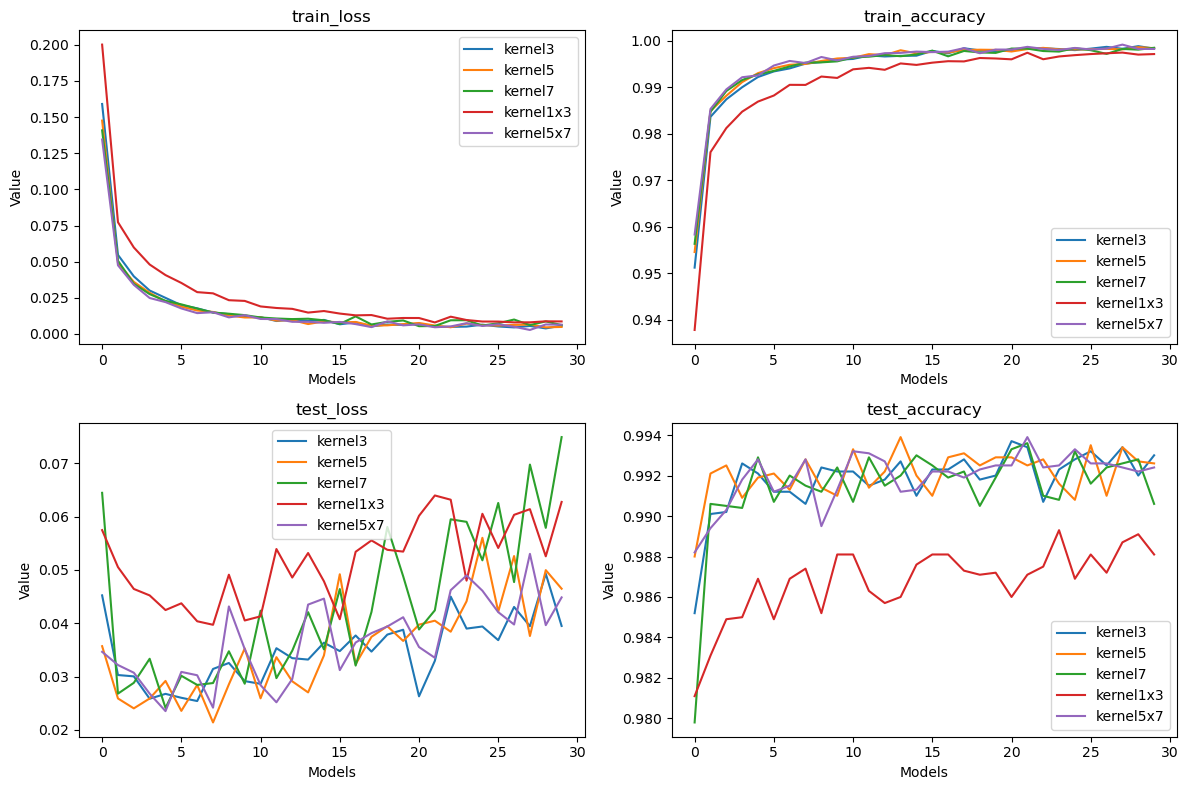

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (ax, metric, name) in enumerate(zip(axes, metrics, metrics_name)):
  for data, mod_name in zip(metric, models_name):
      ax.plot(data, label=mod_name)
      ax.legend()
      ax.set_title(name)
      ax.set_xlabel('Models')
      ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

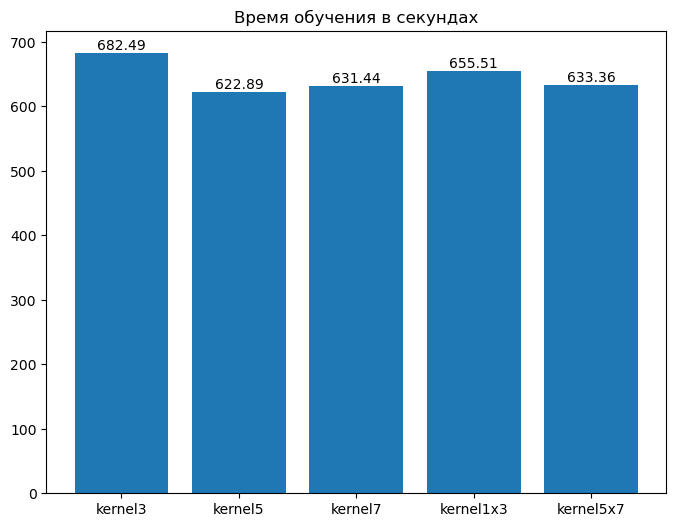

In [21]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models_name, times)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.title("Время обучения в секундах")
plt.show()

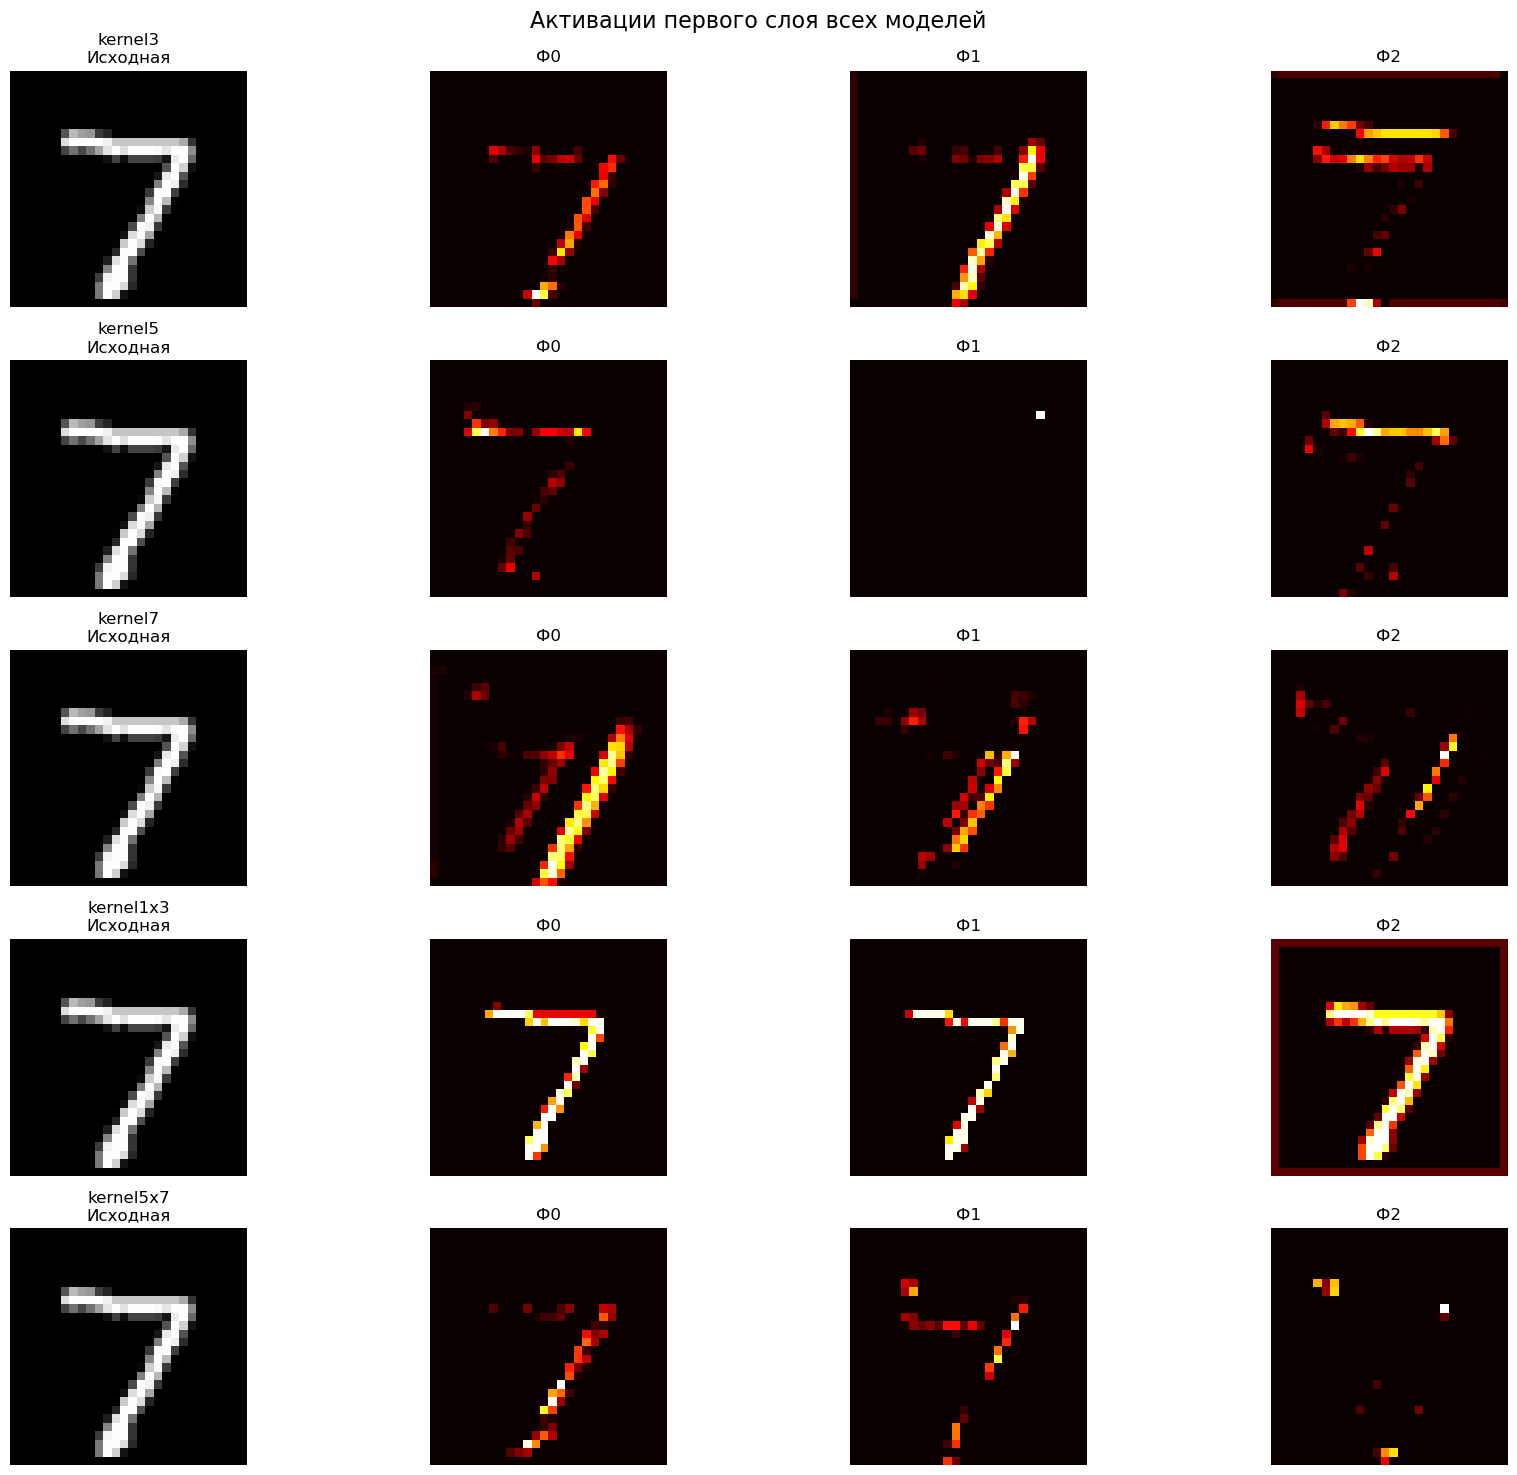

In [22]:
visualize_all_models_activations(models, models_name, test_data, num_filters_to_show=3)

### 2.2 Влияние глубины CNN

In [3]:
cnn_2conv = SimpleCNN().to("cuda")

cnn_4conv = SimpleCNN4Conv().to("cuda")

cnn_6conv = SimpleCNN6Conv().to("cuda")

cnn_with_red = CNNWithResidual().to("cuda")

models = [cnn_2conv, cnn_4conv, cnn_6conv, cnn_with_red]
models_name = ["cnn_2conv", "cnn_4conv", "cnn_6conv", "cnn_with_red"]

In [4]:
metric_train_loss = []
metric_train_acc = []
metric_test_loss = []
metric_test_acc = []
times = []

for model in models:
  start = time.time()
  history = train_model(model, train_data, test_data, epochs=30, device="cuda")
  end = time.time()

  times.append(end-start)

  metric_train_loss.append(history["train_losses"])
  metric_train_acc.append(history["train_accs"])
  metric_test_loss.append(history["test_losses"])
  metric_test_acc.append(history["test_accs"])

metrics = [metric_train_loss, metric_train_acc, metric_test_loss, metric_test_acc]
metrics_name = ["train_loss", "train_accuracy", "test_loss", "test_accuracy"]

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.04it/s]


Epoch 1/30:
Train Loss: 0.1565, Train Acc: 0.9509
Test Loss: 0.0363, Test Acc: 0.9887
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.04it/s]


Epoch 2/30:
Train Loss: 0.0545, Train Acc: 0.9836
Test Loss: 0.0314, Test Acc: 0.9896
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.38it/s]


Epoch 3/30:
Train Loss: 0.0391, Train Acc: 0.9879
Test Loss: 0.0261, Test Acc: 0.9911
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.80it/s]


Epoch 4/30:
Train Loss: 0.0316, Train Acc: 0.9901
Test Loss: 0.0287, Test Acc: 0.9901
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.10it/s]


Epoch 5/30:
Train Loss: 0.0251, Train Acc: 0.9919
Test Loss: 0.0360, Test Acc: 0.9885
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.74it/s]


Epoch 6/30:
Train Loss: 0.0217, Train Acc: 0.9925
Test Loss: 0.0245, Test Acc: 0.9909
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.19it/s]


Epoch 7/30:
Train Loss: 0.0175, Train Acc: 0.9943
Test Loss: 0.0248, Test Acc: 0.9931
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.26it/s]


Epoch 8/30:
Train Loss: 0.0158, Train Acc: 0.9947
Test Loss: 0.0272, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.83it/s]


Epoch 9/30:
Train Loss: 0.0139, Train Acc: 0.9957
Test Loss: 0.0301, Test Acc: 0.9902
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.97it/s]


Epoch 10/30:
Train Loss: 0.0123, Train Acc: 0.9955
Test Loss: 0.0349, Test Acc: 0.9909
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.65it/s]


Epoch 11/30:
Train Loss: 0.0105, Train Acc: 0.9964
Test Loss: 0.0307, Test Acc: 0.9929
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.47it/s]


Epoch 12/30:
Train Loss: 0.0093, Train Acc: 0.9968
Test Loss: 0.0280, Test Acc: 0.9931
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.66it/s]


Epoch 13/30:
Train Loss: 0.0094, Train Acc: 0.9970
Test Loss: 0.0344, Test Acc: 0.9916
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.29it/s]


Epoch 14/30:
Train Loss: 0.0101, Train Acc: 0.9965
Test Loss: 0.0297, Test Acc: 0.9917
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.88it/s]


Epoch 15/30:
Train Loss: 0.0096, Train Acc: 0.9968
Test Loss: 0.0363, Test Acc: 0.9916
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.58it/s]


Epoch 16/30:
Train Loss: 0.0072, Train Acc: 0.9975
Test Loss: 0.0304, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.38it/s]


Epoch 17/30:
Train Loss: 0.0083, Train Acc: 0.9973
Test Loss: 0.0343, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.05it/s]


Epoch 18/30:
Train Loss: 0.0063, Train Acc: 0.9980
Test Loss: 0.0381, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.51it/s]


Epoch 19/30:
Train Loss: 0.0074, Train Acc: 0.9976
Test Loss: 0.0365, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.91it/s]


Epoch 20/30:
Train Loss: 0.0069, Train Acc: 0.9980
Test Loss: 0.0312, Test Acc: 0.9930
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.41it/s]


Epoch 21/30:
Train Loss: 0.0056, Train Acc: 0.9981
Test Loss: 0.0356, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.17it/s]


Epoch 22/30:
Train Loss: 0.0061, Train Acc: 0.9980
Test Loss: 0.0367, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.94it/s]


Epoch 23/30:
Train Loss: 0.0049, Train Acc: 0.9984
Test Loss: 0.0495, Test Acc: 0.9913
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.52it/s]


Epoch 24/30:
Train Loss: 0.0069, Train Acc: 0.9976
Test Loss: 0.0385, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 56.99it/s]


Epoch 25/30:
Train Loss: 0.0055, Train Acc: 0.9983
Test Loss: 0.0407, Test Acc: 0.9919
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.27it/s]


Epoch 26/30:
Train Loss: 0.0054, Train Acc: 0.9983
Test Loss: 0.0421, Test Acc: 0.9919
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.53it/s]


Epoch 27/30:
Train Loss: 0.0063, Train Acc: 0.9980
Test Loss: 0.0375, Test Acc: 0.9918
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.93it/s]


Epoch 28/30:
Train Loss: 0.0044, Train Acc: 0.9986
Test Loss: 0.0433, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.12it/s]


Epoch 29/30:
Train Loss: 0.0054, Train Acc: 0.9982
Test Loss: 0.0405, Test Acc: 0.9927
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.15it/s]


Epoch 30/30:
Train Loss: 0.0042, Train Acc: 0.9988
Test Loss: 0.0455, Test Acc: 0.9914
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.78it/s]


Epoch 1/30:
Train Loss: 0.1633, Train Acc: 0.9499
Test Loss: 0.0522, Test Acc: 0.9825
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.21it/s]


Epoch 2/30:
Train Loss: 0.0517, Train Acc: 0.9843
Test Loss: 0.0268, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.27it/s]


Epoch 3/30:
Train Loss: 0.0365, Train Acc: 0.9887
Test Loss: 0.0271, Test Acc: 0.9916
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.09it/s]


Epoch 4/30:
Train Loss: 0.0291, Train Acc: 0.9909
Test Loss: 0.0275, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.44it/s]


Epoch 5/30:
Train Loss: 0.0223, Train Acc: 0.9933
Test Loss: 0.0326, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.91it/s]


Epoch 6/30:
Train Loss: 0.0197, Train Acc: 0.9939
Test Loss: 0.0238, Test Acc: 0.9929
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 69.31it/s]


Epoch 7/30:
Train Loss: 0.0172, Train Acc: 0.9946
Test Loss: 0.0393, Test Acc: 0.9896
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.90it/s]


Epoch 8/30:
Train Loss: 0.0159, Train Acc: 0.9950
Test Loss: 0.0368, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.61it/s]


Epoch 9/30:
Train Loss: 0.0137, Train Acc: 0.9958
Test Loss: 0.0249, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 69.78it/s]


Epoch 10/30:
Train Loss: 0.0114, Train Acc: 0.9963
Test Loss: 0.0278, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.24it/s]


Epoch 11/30:
Train Loss: 0.0094, Train Acc: 0.9972
Test Loss: 0.0319, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.50it/s]


Epoch 12/30:
Train Loss: 0.0106, Train Acc: 0.9966
Test Loss: 0.0266, Test Acc: 0.9938
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.61it/s]


Epoch 13/30:
Train Loss: 0.0099, Train Acc: 0.9972
Test Loss: 0.0316, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.16it/s]


Epoch 14/30:
Train Loss: 0.0095, Train Acc: 0.9971
Test Loss: 0.0433, Test Acc: 0.9897
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.37it/s]


Epoch 15/30:
Train Loss: 0.0092, Train Acc: 0.9973
Test Loss: 0.0358, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.82it/s]


Epoch 16/30:
Train Loss: 0.0069, Train Acc: 0.9981
Test Loss: 0.0302, Test Acc: 0.9932
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.43it/s]


Epoch 17/30:
Train Loss: 0.0078, Train Acc: 0.9976
Test Loss: 0.0328, Test Acc: 0.9923
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.51it/s]


Epoch 18/30:
Train Loss: 0.0080, Train Acc: 0.9975
Test Loss: 0.0342, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.34it/s]


Epoch 19/30:
Train Loss: 0.0064, Train Acc: 0.9982
Test Loss: 0.0348, Test Acc: 0.9931
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.90it/s]


Epoch 20/30:
Train Loss: 0.0090, Train Acc: 0.9978
Test Loss: 0.0324, Test Acc: 0.9914
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.44it/s]


Epoch 21/30:
Train Loss: 0.0069, Train Acc: 0.9979
Test Loss: 0.0426, Test Acc: 0.9930
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.71it/s]


Epoch 22/30:
Train Loss: 0.0057, Train Acc: 0.9983
Test Loss: 0.0321, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.08it/s]


Epoch 23/30:
Train Loss: 0.0057, Train Acc: 0.9983
Test Loss: 0.0432, Test Acc: 0.9915
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.79it/s]


Epoch 24/30:
Train Loss: 0.0080, Train Acc: 0.9979
Test Loss: 0.0437, Test Acc: 0.9928
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 71.11it/s]


Epoch 25/30:
Train Loss: 0.0061, Train Acc: 0.9984
Test Loss: 0.0513, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.50it/s]


Epoch 26/30:
Train Loss: 0.0055, Train Acc: 0.9986
Test Loss: 0.0399, Test Acc: 0.9932
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.11it/s]


Epoch 27/30:
Train Loss: 0.0072, Train Acc: 0.9980
Test Loss: 0.0465, Test Acc: 0.9916
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.44it/s]


Epoch 28/30:
Train Loss: 0.0060, Train Acc: 0.9983
Test Loss: 0.0564, Test Acc: 0.9918
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.74it/s]


Epoch 29/30:
Train Loss: 0.0061, Train Acc: 0.9983
Test Loss: 0.0395, Test Acc: 0.9930
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.78it/s]


Epoch 30/30:
Train Loss: 0.0063, Train Acc: 0.9983
Test Loss: 0.0441, Test Acc: 0.9936
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.56it/s]


Epoch 1/30:
Train Loss: 0.2026, Train Acc: 0.9344
Test Loss: 0.0459, Test Acc: 0.9853
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.69it/s]


Epoch 2/30:
Train Loss: 0.0598, Train Acc: 0.9835
Test Loss: 0.0541, Test Acc: 0.9841
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.65it/s]


Epoch 3/30:
Train Loss: 0.0433, Train Acc: 0.9877
Test Loss: 0.0365, Test Acc: 0.9877
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.83it/s]


Epoch 4/30:
Train Loss: 0.0334, Train Acc: 0.9903
Test Loss: 0.0374, Test Acc: 0.9884
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.20it/s]


Epoch 5/30:
Train Loss: 0.0277, Train Acc: 0.9923
Test Loss: 0.0320, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.63it/s]


Epoch 6/30:
Train Loss: 0.0250, Train Acc: 0.9927
Test Loss: 0.0363, Test Acc: 0.9895
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.78it/s]


Epoch 7/30:
Train Loss: 0.0214, Train Acc: 0.9938
Test Loss: 0.0414, Test Acc: 0.9881
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.93it/s]


Epoch 8/30:
Train Loss: 0.0189, Train Acc: 0.9947
Test Loss: 0.0311, Test Acc: 0.9917
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.88it/s]


Epoch 9/30:
Train Loss: 0.0158, Train Acc: 0.9954
Test Loss: 0.0272, Test Acc: 0.9933
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.89it/s]


Epoch 10/30:
Train Loss: 0.0174, Train Acc: 0.9950
Test Loss: 0.0288, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.23it/s]


Epoch 11/30:
Train Loss: 0.0124, Train Acc: 0.9962
Test Loss: 0.0304, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.65it/s]


Epoch 12/30:
Train Loss: 0.0137, Train Acc: 0.9962
Test Loss: 0.0370, Test Acc: 0.9927
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.34it/s]


Epoch 13/30:
Train Loss: 0.0139, Train Acc: 0.9958
Test Loss: 0.0272, Test Acc: 0.9938
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.98it/s]


Epoch 14/30:
Train Loss: 0.0084, Train Acc: 0.9974
Test Loss: 0.0319, Test Acc: 0.9914
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.72it/s]


Epoch 15/30:
Train Loss: 0.0121, Train Acc: 0.9963
Test Loss: 0.0293, Test Acc: 0.9920
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.32it/s]


Epoch 16/30:
Train Loss: 0.0099, Train Acc: 0.9971
Test Loss: 0.0473, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.27it/s]


Epoch 17/30:
Train Loss: 0.0107, Train Acc: 0.9971
Test Loss: 0.0384, Test Acc: 0.9931
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.38it/s]


Epoch 18/30:
Train Loss: 0.0097, Train Acc: 0.9973
Test Loss: 0.0410, Test Acc: 0.9907
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.65it/s]


Epoch 19/30:
Train Loss: 0.0077, Train Acc: 0.9978
Test Loss: 0.0406, Test Acc: 0.9911
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.09it/s]


Epoch 20/30:
Train Loss: 0.0104, Train Acc: 0.9972
Test Loss: 0.0317, Test Acc: 0.9930
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.99it/s]


Epoch 21/30:
Train Loss: 0.0067, Train Acc: 0.9980
Test Loss: 0.0401, Test Acc: 0.9930
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.32it/s]


Epoch 22/30:
Train Loss: 0.0087, Train Acc: 0.9975
Test Loss: 0.0536, Test Acc: 0.9900
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.13it/s]


Epoch 23/30:
Train Loss: 0.0101, Train Acc: 0.9971
Test Loss: 0.0506, Test Acc: 0.9910
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.90it/s]


Epoch 24/30:
Train Loss: 0.0080, Train Acc: 0.9980
Test Loss: 0.0434, Test Acc: 0.9921
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 58.49it/s]


Epoch 25/30:
Train Loss: 0.0085, Train Acc: 0.9977
Test Loss: 0.0436, Test Acc: 0.9933
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.53it/s]


Epoch 26/30:
Train Loss: 0.0089, Train Acc: 0.9975
Test Loss: 0.0414, Test Acc: 0.9932
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.95it/s]


Epoch 27/30:
Train Loss: 0.0049, Train Acc: 0.9988
Test Loss: 0.0399, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 55.77it/s]


Epoch 28/30:
Train Loss: 0.0064, Train Acc: 0.9985
Test Loss: 0.0640, Test Acc: 0.9903
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 54.65it/s]


Epoch 29/30:
Train Loss: 0.0121, Train Acc: 0.9969
Test Loss: 0.0557, Test Acc: 0.9935
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 48.08it/s]


Epoch 30/30:
Train Loss: 0.0073, Train Acc: 0.9982
Test Loss: 0.0487, Test Acc: 0.9926
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.84it/s]


Epoch 1/30:
Train Loss: 0.1208, Train Acc: 0.9630
Test Loss: 0.0516, Test Acc: 0.9842
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.05it/s]


Epoch 2/30:
Train Loss: 0.0449, Train Acc: 0.9862
Test Loss: 0.0467, Test Acc: 0.9848
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.06it/s]


Epoch 3/30:
Train Loss: 0.0320, Train Acc: 0.9900
Test Loss: 0.0402, Test Acc: 0.9866
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.98it/s]


Epoch 4/30:
Train Loss: 0.0289, Train Acc: 0.9906
Test Loss: 0.0385, Test Acc: 0.9873
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.34it/s]


Epoch 5/30:
Train Loss: 0.0206, Train Acc: 0.9936
Test Loss: 0.0477, Test Acc: 0.9856
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.28it/s]


Epoch 6/30:
Train Loss: 0.0197, Train Acc: 0.9935
Test Loss: 0.0543, Test Acc: 0.9858
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.57it/s]


Epoch 7/30:
Train Loss: 0.0166, Train Acc: 0.9948
Test Loss: 0.0334, Test Acc: 0.9900
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.76it/s]


Epoch 8/30:
Train Loss: 0.0152, Train Acc: 0.9951
Test Loss: 0.0324, Test Acc: 0.9916
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.13it/s]


Epoch 9/30:
Train Loss: 0.0118, Train Acc: 0.9960
Test Loss: 0.0479, Test Acc: 0.9881
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 67.32it/s]


Epoch 10/30:
Train Loss: 0.0125, Train Acc: 0.9962
Test Loss: 0.0359, Test Acc: 0.9899
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.33it/s]


Epoch 11/30:
Train Loss: 0.0128, Train Acc: 0.9960
Test Loss: 0.0292, Test Acc: 0.9909
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.26it/s]


Epoch 12/30:
Train Loss: 0.0081, Train Acc: 0.9972
Test Loss: 0.0355, Test Acc: 0.9915
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.32it/s]


Epoch 13/30:
Train Loss: 0.0086, Train Acc: 0.9972
Test Loss: 0.0393, Test Acc: 0.9909
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.92it/s]


Epoch 14/30:
Train Loss: 0.0096, Train Acc: 0.9969
Test Loss: 0.0429, Test Acc: 0.9896
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.32it/s]


Epoch 15/30:
Train Loss: 0.0052, Train Acc: 0.9981
Test Loss: 0.0383, Test Acc: 0.9917
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.76it/s]


Epoch 16/30:
Train Loss: 0.0083, Train Acc: 0.9976
Test Loss: 0.0358, Test Acc: 0.9906
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.33it/s]


Epoch 17/30:
Train Loss: 0.0047, Train Acc: 0.9983
Test Loss: 0.0362, Test Acc: 0.9913
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.03it/s]


Epoch 18/30:
Train Loss: 0.0069, Train Acc: 0.9979
Test Loss: 0.0474, Test Acc: 0.9898
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.36it/s]


Epoch 19/30:
Train Loss: 0.0065, Train Acc: 0.9980
Test Loss: 0.0465, Test Acc: 0.9904
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.17it/s]


Epoch 20/30:
Train Loss: 0.0050, Train Acc: 0.9983
Test Loss: 0.0419, Test Acc: 0.9900
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 65.44it/s]


Epoch 21/30:
Train Loss: 0.0052, Train Acc: 0.9984
Test Loss: 0.0360, Test Acc: 0.9919
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.76it/s]


Epoch 22/30:
Train Loss: 0.0052, Train Acc: 0.9985
Test Loss: 0.0330, Test Acc: 0.9925
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.33it/s]


Epoch 23/30:
Train Loss: 0.0034, Train Acc: 0.9989
Test Loss: 0.0365, Test Acc: 0.9914
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.09it/s]


Epoch 24/30:
Train Loss: 0.0067, Train Acc: 0.9980
Test Loss: 0.0535, Test Acc: 0.9896
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.88it/s]


Epoch 25/30:
Train Loss: 0.0030, Train Acc: 0.9991
Test Loss: 0.0473, Test Acc: 0.9924
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.60it/s]


Epoch 26/30:
Train Loss: 0.0059, Train Acc: 0.9983
Test Loss: 0.0379, Test Acc: 0.9922
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.07it/s]


Epoch 27/30:
Train Loss: 0.0026, Train Acc: 0.9991
Test Loss: 0.0432, Test Acc: 0.9912
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.38it/s]


Epoch 28/30:
Train Loss: 0.0046, Train Acc: 0.9986
Test Loss: 0.0451, Test Acc: 0.9896
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.82it/s]


Epoch 29/30:
Train Loss: 0.0032, Train Acc: 0.9989
Test Loss: 0.0469, Test Acc: 0.9911
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.13it/s]

Epoch 30/30:
Train Loss: 0.0039, Train Acc: 0.9990
Test Loss: 0.0464, Test Acc: 0.9908
--------------------------------------------------


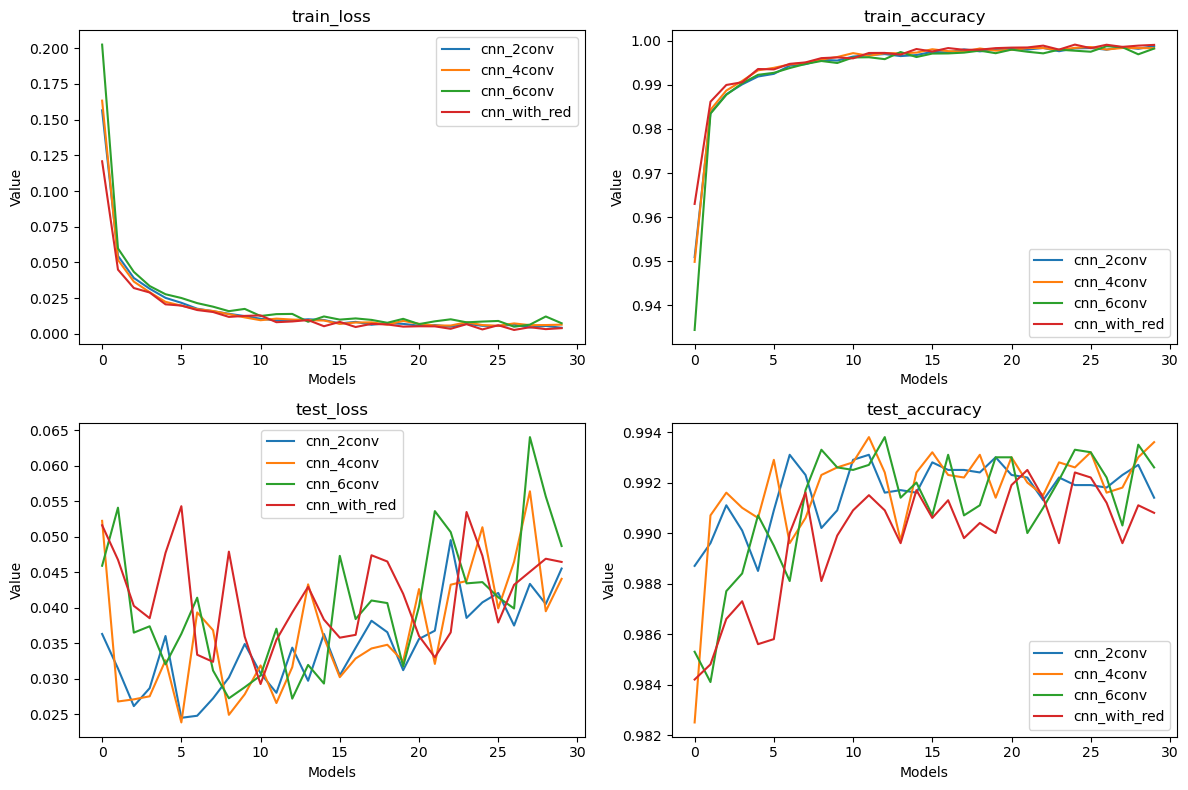

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (ax, metric, name) in enumerate(zip(axes, metrics, metrics_name)):
  for data, mod_name in zip(metric, models_name):
      ax.plot(data, label=mod_name)
      ax.legend()
      ax.set_title(name)
      ax.set_xlabel('Models')
      ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

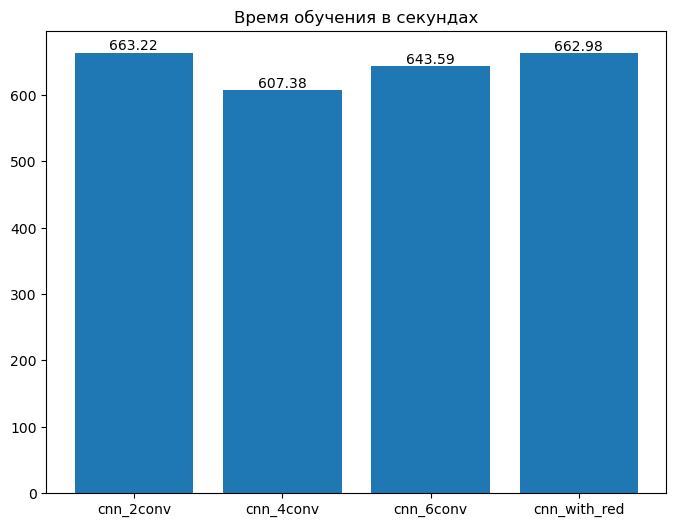

In [6]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models_name, times)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.title("Время обучения в секундах")
plt.show()

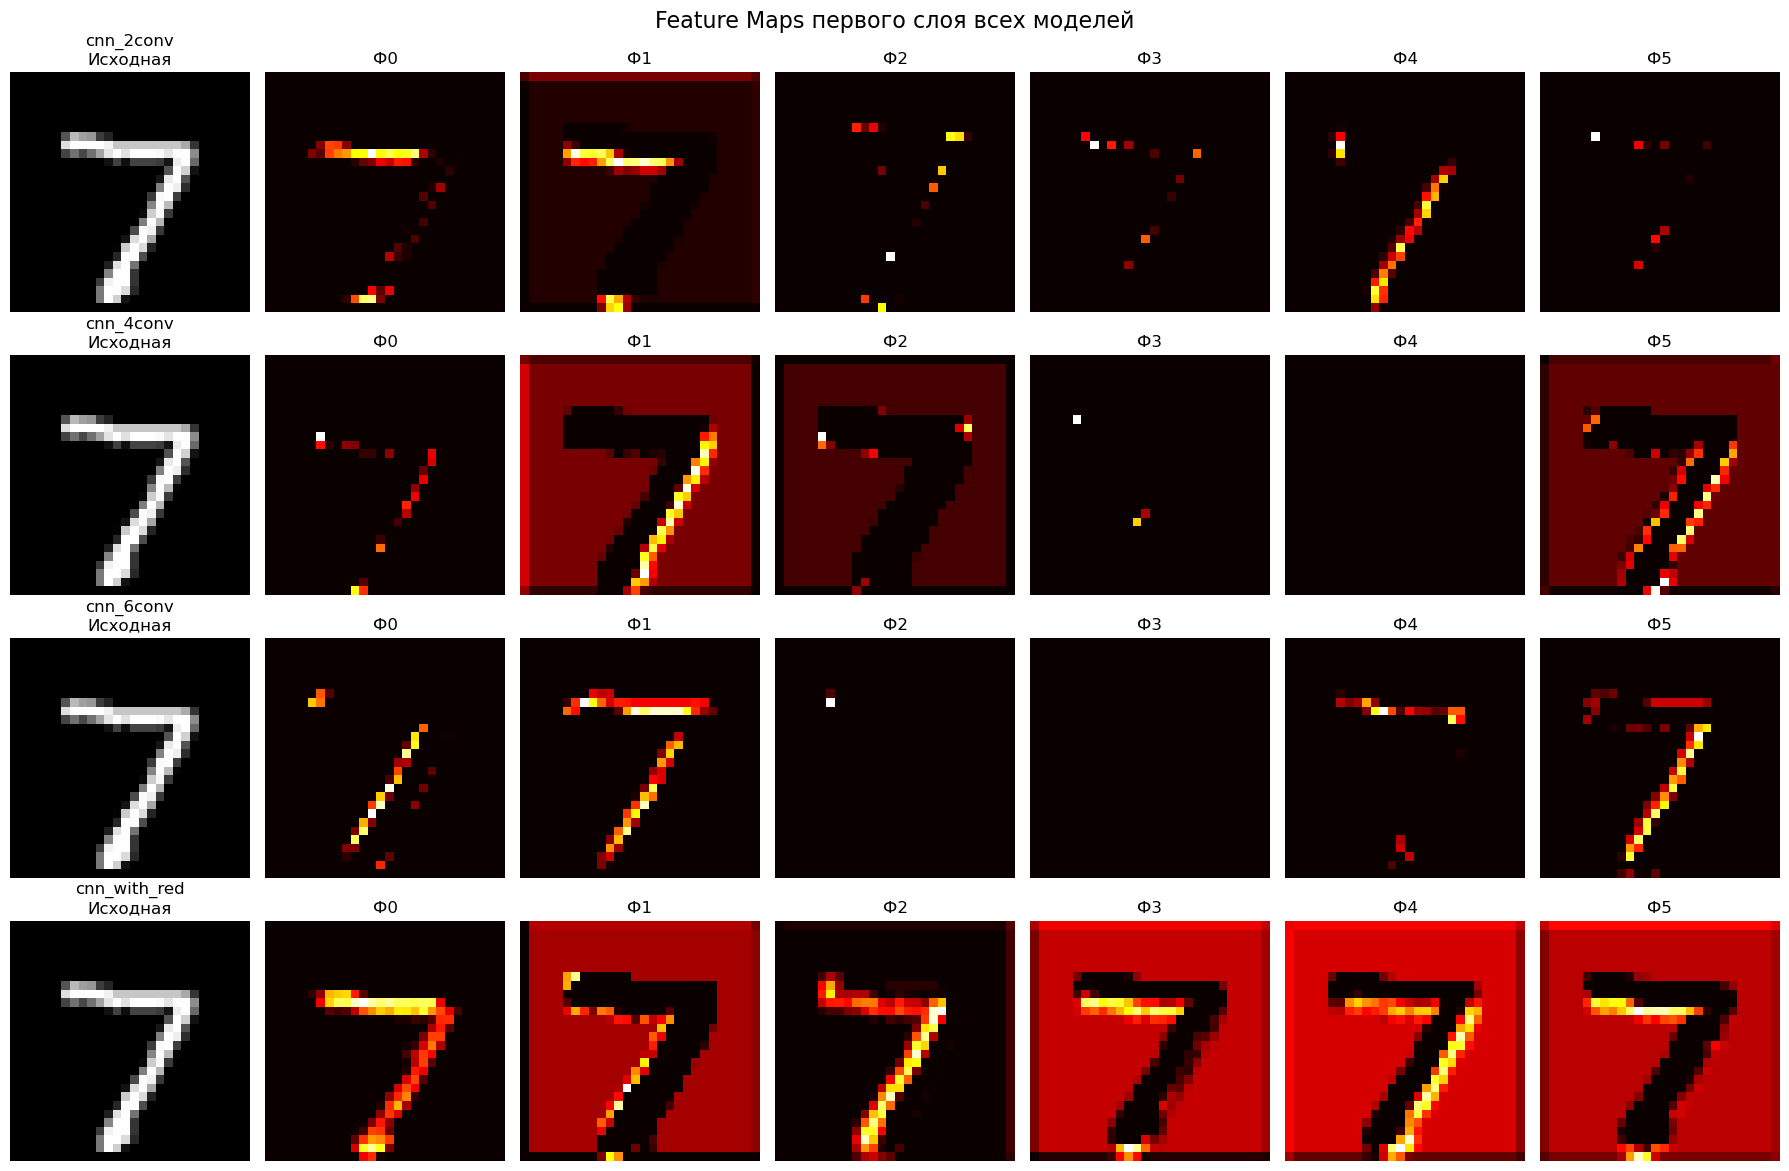

In [7]:
visualize_all_models_feature_maps(models, models_name, test_data)

## Задание 3: Кастомные слои и эксперименты

### 3.1 Реализация кастомных слоев

In [2]:
train_data, test_data = get_cifar_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
model_noise = CastomWithNoiseSimpleCNN().to("cuda")

model_attention = CastomAttentionSimpleCNN().to("cuda")

model_gelu = CastomGeluSimpleCNN().to("cuda")

model_pool = CastomPoolSimpleCNN().to("cuda")

models = [model_noise, model_attention, model_gelu, model_pool]
models_name = ["model_noise", "model_attention", "model_gelu", "model_pool"]

In [4]:
metric_train_loss = []
metric_train_acc = []
metric_test_loss = []
metric_test_acc = []
times = []

for model in models:
  start = time.time()
  history = train_model(model, train_data, test_data, epochs=30, device="cuda")
  end = time.time()

  times.append(end-start)

  metric_train_loss.append(history["train_losses"])
  metric_train_acc.append(history["train_accs"])
  metric_test_loss.append(history["test_losses"])
  metric_test_acc.append(history["test_accs"])

metrics = [metric_train_loss, metric_train_acc, metric_test_loss, metric_test_acc]
metrics_name = ["train_loss", "train_accuracy", "test_loss", "test_accuracy"]

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.08it/s]


Epoch 1/30:
Train Loss: 1.2386, Train Acc: 0.5609
Test Loss: 1.0082, Test Acc: 0.6393
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.47it/s]


Epoch 2/30:
Train Loss: 0.8254, Train Acc: 0.7111
Test Loss: 0.9559, Test Acc: 0.6683
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.35it/s]


Epoch 3/30:
Train Loss: 0.5891, Train Acc: 0.7943
Test Loss: 0.9028, Test Acc: 0.6973
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.19it/s]


Epoch 4/30:
Train Loss: 0.3470, Train Acc: 0.8799
Test Loss: 1.0982, Test Acc: 0.6828
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.54it/s]


Epoch 5/30:
Train Loss: 0.1702, Train Acc: 0.9414
Test Loss: 1.3185, Test Acc: 0.6940
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.05it/s]


Epoch 6/30:
Train Loss: 0.1032, Train Acc: 0.9656
Test Loss: 1.6464, Test Acc: 0.6837
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.69it/s]


Epoch 7/30:
Train Loss: 0.0821, Train Acc: 0.9725
Test Loss: 1.7521, Test Acc: 0.6866
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.39it/s]


Epoch 8/30:
Train Loss: 0.0631, Train Acc: 0.9790
Test Loss: 2.0209, Test Acc: 0.6778
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.88it/s]


Epoch 9/30:
Train Loss: 0.0641, Train Acc: 0.9786
Test Loss: 2.0403, Test Acc: 0.6792
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.06it/s]


Epoch 10/30:
Train Loss: 0.0609, Train Acc: 0.9796
Test Loss: 2.2399, Test Acc: 0.6787
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.17it/s]


Epoch 11/30:
Train Loss: 0.0496, Train Acc: 0.9831
Test Loss: 2.4451, Test Acc: 0.6684
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.23it/s]


Epoch 12/30:
Train Loss: 0.0545, Train Acc: 0.9816
Test Loss: 2.4543, Test Acc: 0.6718
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.38it/s]


Epoch 13/30:
Train Loss: 0.0484, Train Acc: 0.9840
Test Loss: 2.7042, Test Acc: 0.6793
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.10it/s]


Epoch 14/30:
Train Loss: 0.0415, Train Acc: 0.9868
Test Loss: 2.6402, Test Acc: 0.6726
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.97it/s]


Epoch 15/30:
Train Loss: 0.0450, Train Acc: 0.9856
Test Loss: 2.7687, Test Acc: 0.6779
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.20it/s]


Epoch 16/30:
Train Loss: 0.0445, Train Acc: 0.9856
Test Loss: 2.9647, Test Acc: 0.6739
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.88it/s]


Epoch 17/30:
Train Loss: 0.0477, Train Acc: 0.9848
Test Loss: 2.9349, Test Acc: 0.6862
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.55it/s]


Epoch 18/30:
Train Loss: 0.0445, Train Acc: 0.9860
Test Loss: 3.0937, Test Acc: 0.6725
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.33it/s]


Epoch 19/30:
Train Loss: 0.0356, Train Acc: 0.9884
Test Loss: 3.1729, Test Acc: 0.6788
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.91it/s]


Epoch 20/30:
Train Loss: 0.0396, Train Acc: 0.9871
Test Loss: 3.1964, Test Acc: 0.6803
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.88it/s]


Epoch 21/30:
Train Loss: 0.0338, Train Acc: 0.9899
Test Loss: 3.2969, Test Acc: 0.6708
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.64it/s]


Epoch 22/30:
Train Loss: 0.0409, Train Acc: 0.9878
Test Loss: 3.2414, Test Acc: 0.6826
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.33it/s]


Epoch 23/30:
Train Loss: 0.0345, Train Acc: 0.9893
Test Loss: 3.2817, Test Acc: 0.6803
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.98it/s]


Epoch 24/30:
Train Loss: 0.0358, Train Acc: 0.9890
Test Loss: 3.3699, Test Acc: 0.6744
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.01it/s]


Epoch 25/30:
Train Loss: 0.0378, Train Acc: 0.9890
Test Loss: 3.6144, Test Acc: 0.6809
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.74it/s]


Epoch 26/30:
Train Loss: 0.0340, Train Acc: 0.9897
Test Loss: 3.5261, Test Acc: 0.6749
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.10it/s]


Epoch 27/30:
Train Loss: 0.0403, Train Acc: 0.9884
Test Loss: 3.5968, Test Acc: 0.6686
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.72it/s]


Epoch 28/30:
Train Loss: 0.0314, Train Acc: 0.9906
Test Loss: 3.9211, Test Acc: 0.6768
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.22it/s]


Epoch 29/30:
Train Loss: 0.0392, Train Acc: 0.9886
Test Loss: 3.7850, Test Acc: 0.6742
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.59it/s]


Epoch 30/30:
Train Loss: 0.0324, Train Acc: 0.9905
Test Loss: 3.8199, Test Acc: 0.6815
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.29it/s]


Epoch 1/30:
Train Loss: 1.2834, Train Acc: 0.5413
Test Loss: 1.0057, Test Acc: 0.6460
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.50it/s]


Epoch 2/30:
Train Loss: 0.8800, Train Acc: 0.6918
Test Loss: 0.8858, Test Acc: 0.6849
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.07it/s]


Epoch 3/30:
Train Loss: 0.6896, Train Acc: 0.7569
Test Loss: 0.8394, Test Acc: 0.7094
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.88it/s]


Epoch 4/30:
Train Loss: 0.5252, Train Acc: 0.8151
Test Loss: 0.8680, Test Acc: 0.7225
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.88it/s]


Epoch 5/30:
Train Loss: 0.3781, Train Acc: 0.8668
Test Loss: 0.9805, Test Acc: 0.7084
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.52it/s]


Epoch 6/30:
Train Loss: 0.2616, Train Acc: 0.9084
Test Loss: 1.0684, Test Acc: 0.7144
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.04it/s]


Epoch 7/30:
Train Loss: 0.1974, Train Acc: 0.9310
Test Loss: 1.1849, Test Acc: 0.7111
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.54it/s]


Epoch 8/30:
Train Loss: 0.1567, Train Acc: 0.9461
Test Loss: 1.3112, Test Acc: 0.7069
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.57it/s]


Epoch 9/30:
Train Loss: 0.1322, Train Acc: 0.9543
Test Loss: 1.3674, Test Acc: 0.7065
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.78it/s]


Epoch 10/30:
Train Loss: 0.1220, Train Acc: 0.9570
Test Loss: 1.4503, Test Acc: 0.7061
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.79it/s]


Epoch 11/30:
Train Loss: 0.1083, Train Acc: 0.9627
Test Loss: 1.5337, Test Acc: 0.6971
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.48it/s]


Epoch 12/30:
Train Loss: 0.0991, Train Acc: 0.9663
Test Loss: 1.5714, Test Acc: 0.7048
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.02it/s]


Epoch 13/30:
Train Loss: 0.0878, Train Acc: 0.9698
Test Loss: 1.5969, Test Acc: 0.7074
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.91it/s]


Epoch 14/30:
Train Loss: 0.0833, Train Acc: 0.9712
Test Loss: 1.7241, Test Acc: 0.7023
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.40it/s]


Epoch 15/30:
Train Loss: 0.0781, Train Acc: 0.9727
Test Loss: 1.7482, Test Acc: 0.7029
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.57it/s]


Epoch 16/30:
Train Loss: 0.0742, Train Acc: 0.9749
Test Loss: 1.7422, Test Acc: 0.7074
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.28it/s]


Epoch 17/30:
Train Loss: 0.0714, Train Acc: 0.9756
Test Loss: 1.7486, Test Acc: 0.7134
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.96it/s]


Epoch 18/30:
Train Loss: 0.0690, Train Acc: 0.9757
Test Loss: 1.7959, Test Acc: 0.7037
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.67it/s]


Epoch 19/30:
Train Loss: 0.0669, Train Acc: 0.9770
Test Loss: 1.9013, Test Acc: 0.7055
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.37it/s]


Epoch 20/30:
Train Loss: 0.0627, Train Acc: 0.9785
Test Loss: 1.8776, Test Acc: 0.7093
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.15it/s]


Epoch 21/30:
Train Loss: 0.0618, Train Acc: 0.9788
Test Loss: 2.0532, Test Acc: 0.7083
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.10it/s]


Epoch 22/30:
Train Loss: 0.0616, Train Acc: 0.9792
Test Loss: 2.0859, Test Acc: 0.7094
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.45it/s]


Epoch 23/30:
Train Loss: 0.0545, Train Acc: 0.9820
Test Loss: 2.1275, Test Acc: 0.7002
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.62it/s]


Epoch 24/30:
Train Loss: 0.0533, Train Acc: 0.9812
Test Loss: 2.0373, Test Acc: 0.7025
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.45it/s]


Epoch 25/30:
Train Loss: 0.0590, Train Acc: 0.9807
Test Loss: 2.0645, Test Acc: 0.7030
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.26it/s]


Epoch 26/30:
Train Loss: 0.0553, Train Acc: 0.9820
Test Loss: 2.1298, Test Acc: 0.7046
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.55it/s]


Epoch 27/30:
Train Loss: 0.0479, Train Acc: 0.9838
Test Loss: 2.3312, Test Acc: 0.7043
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.47it/s]


Epoch 28/30:
Train Loss: 0.0557, Train Acc: 0.9814
Test Loss: 2.1403, Test Acc: 0.7049
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.56it/s]


Epoch 29/30:
Train Loss: 0.0532, Train Acc: 0.9824
Test Loss: 2.1616, Test Acc: 0.7037
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.45it/s]


Epoch 30/30:
Train Loss: 0.0481, Train Acc: 0.9842
Test Loss: 2.3113, Test Acc: 0.7019
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.07it/s]


Epoch 1/30:
Train Loss: 1.1988, Train Acc: 0.5757
Test Loss: 0.9390, Test Acc: 0.6709
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.46it/s]


Epoch 2/30:
Train Loss: 0.7752, Train Acc: 0.7317
Test Loss: 0.8133, Test Acc: 0.7189
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.28it/s]


Epoch 3/30:
Train Loss: 0.5015, Train Acc: 0.8263
Test Loss: 0.8626, Test Acc: 0.7133
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.23it/s]


Epoch 4/30:
Train Loss: 0.3034, Train Acc: 0.8934
Test Loss: 0.9721, Test Acc: 0.7194
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.54it/s]


Epoch 5/30:
Train Loss: 0.1980, Train Acc: 0.9314
Test Loss: 1.0384, Test Acc: 0.7180
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.88it/s]


Epoch 6/30:
Train Loss: 0.1472, Train Acc: 0.9491
Test Loss: 1.1205, Test Acc: 0.7210
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.81it/s]


Epoch 7/30:
Train Loss: 0.1268, Train Acc: 0.9562
Test Loss: 1.2344, Test Acc: 0.7056
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.85it/s]


Epoch 8/30:
Train Loss: 0.1130, Train Acc: 0.9622
Test Loss: 1.3962, Test Acc: 0.7215
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.70it/s]


Epoch 9/30:
Train Loss: 0.0988, Train Acc: 0.9661
Test Loss: 1.3950, Test Acc: 0.7172
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.70it/s]


Epoch 10/30:
Train Loss: 0.0946, Train Acc: 0.9679
Test Loss: 1.4452, Test Acc: 0.7194
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.12it/s]


Epoch 11/30:
Train Loss: 0.0886, Train Acc: 0.9701
Test Loss: 1.6749, Test Acc: 0.7101
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.35it/s]


Epoch 12/30:
Train Loss: 0.0871, Train Acc: 0.9707
Test Loss: 1.6455, Test Acc: 0.7131
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.96it/s]


Epoch 13/30:
Train Loss: 0.0748, Train Acc: 0.9744
Test Loss: 1.7260, Test Acc: 0.7092
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.52it/s]


Epoch 14/30:
Train Loss: 0.0795, Train Acc: 0.9732
Test Loss: 1.6618, Test Acc: 0.7212
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.50it/s]


Epoch 15/30:
Train Loss: 0.0782, Train Acc: 0.9741
Test Loss: 1.6507, Test Acc: 0.7208
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.38it/s]


Epoch 16/30:
Train Loss: 0.0646, Train Acc: 0.9788
Test Loss: 1.6821, Test Acc: 0.7165
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.61it/s]


Epoch 17/30:
Train Loss: 0.0732, Train Acc: 0.9767
Test Loss: 1.7494, Test Acc: 0.7168
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.86it/s]


Epoch 18/30:
Train Loss: 0.0673, Train Acc: 0.9774
Test Loss: 1.8717, Test Acc: 0.7153
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.36it/s]


Epoch 19/30:
Train Loss: 0.0695, Train Acc: 0.9784
Test Loss: 1.8204, Test Acc: 0.7144
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.50it/s]


Epoch 20/30:
Train Loss: 0.0576, Train Acc: 0.9810
Test Loss: 1.9244, Test Acc: 0.7189
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.03it/s]


Epoch 21/30:
Train Loss: 0.0592, Train Acc: 0.9810
Test Loss: 2.0059, Test Acc: 0.7090
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.86it/s]


Epoch 22/30:
Train Loss: 0.0703, Train Acc: 0.9785
Test Loss: 1.8261, Test Acc: 0.7204
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.49it/s]


Epoch 23/30:
Train Loss: 0.0600, Train Acc: 0.9815
Test Loss: 2.2575, Test Acc: 0.7161
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.91it/s]


Epoch 24/30:
Train Loss: 0.0604, Train Acc: 0.9817
Test Loss: 2.0873, Test Acc: 0.7174
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.18it/s]


Epoch 25/30:
Train Loss: 0.0579, Train Acc: 0.9816
Test Loss: 1.9828, Test Acc: 0.7166
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.00it/s]


Epoch 26/30:
Train Loss: 0.0556, Train Acc: 0.9822
Test Loss: 2.0502, Test Acc: 0.7192
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 63.48it/s]


Epoch 27/30:
Train Loss: 0.0593, Train Acc: 0.9815
Test Loss: 2.0035, Test Acc: 0.7106
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.47it/s]


Epoch 28/30:
Train Loss: 0.0565, Train Acc: 0.9824
Test Loss: 2.2425, Test Acc: 0.7154
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.08it/s]


Epoch 29/30:
Train Loss: 0.0644, Train Acc: 0.9817
Test Loss: 2.1926, Test Acc: 0.7124
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 62.47it/s]


Epoch 30/30:
Train Loss: 0.0487, Train Acc: 0.9841
Test Loss: 2.5200, Test Acc: 0.7162
--------------------------------------------------


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x5184 and 16384x256)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (ax, metric, name) in enumerate(zip(axes, metrics, metrics_name)):
  for data, mod_name in zip(metric, models_name):
      ax.plot(data, label=mod_name)
      ax.legend()
      ax.set_title(name)
      ax.set_xlabel('Models')
      ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models_name, times)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.title("Время обучения в секундах")
plt.show()

### 3.2 Эксперименты с Residual блоками

In [ ]:
model_res = CNNWithResidual(input_channels=3).to("cuda")

model_bot = CNNWithBottleneck(input_channels=3).to("cuda")

model_wide = CNNWithWideres(input_channels=3).to("cuda")

models = [model_res, model_bot, model_wide]
models_name = ["model_res", "model_bot", "model_wide"]

In [ ]:
metric_train_loss = []
metric_train_acc = []
metric_test_loss = []
metric_test_acc = []
times = []

for model in models:
  start = time.time()
  history = train_model(model, train_data, test_data, epochs=30, device="cuda")
  end = time.time()

  times.append(end-start)

  metric_train_loss.append(history["train_losses"])
  metric_train_acc.append(history["train_accs"])
  metric_test_loss.append(history["test_losses"])
  metric_test_acc.append(history["test_accs"])

metrics = [metric_train_loss, metric_train_acc, metric_test_loss, metric_test_acc]
metrics_name = ["train_loss", "train_accuracy", "test_loss", "test_accuracy"]

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (ax, metric, name) in enumerate(zip(axes, metrics, metrics_name)):
  for data, mod_name in zip(metric, models_name):
      ax.plot(data, label=mod_name)
      ax.legend()
      ax.set_title(name)
      ax.set_xlabel('Models')
      ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models_name, times)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.title("Время обучения в секундах")
plt.show()